In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/klasterisasi_negara/')
from utils.EDA import Visualisasi,Skalasisasi
sns.set()


In [2]:
datas = pd.read_csv('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/klasterisasi_negara/dataset/Country-data.csv')

In [3]:
datas

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
#cek null
datas.isna().sum().sum()

0

In [5]:
datas.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
datas.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
data_fitur = datas[datas.columns[1:]] # ambil data tanpa nama negara

In [9]:
data_fitur

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


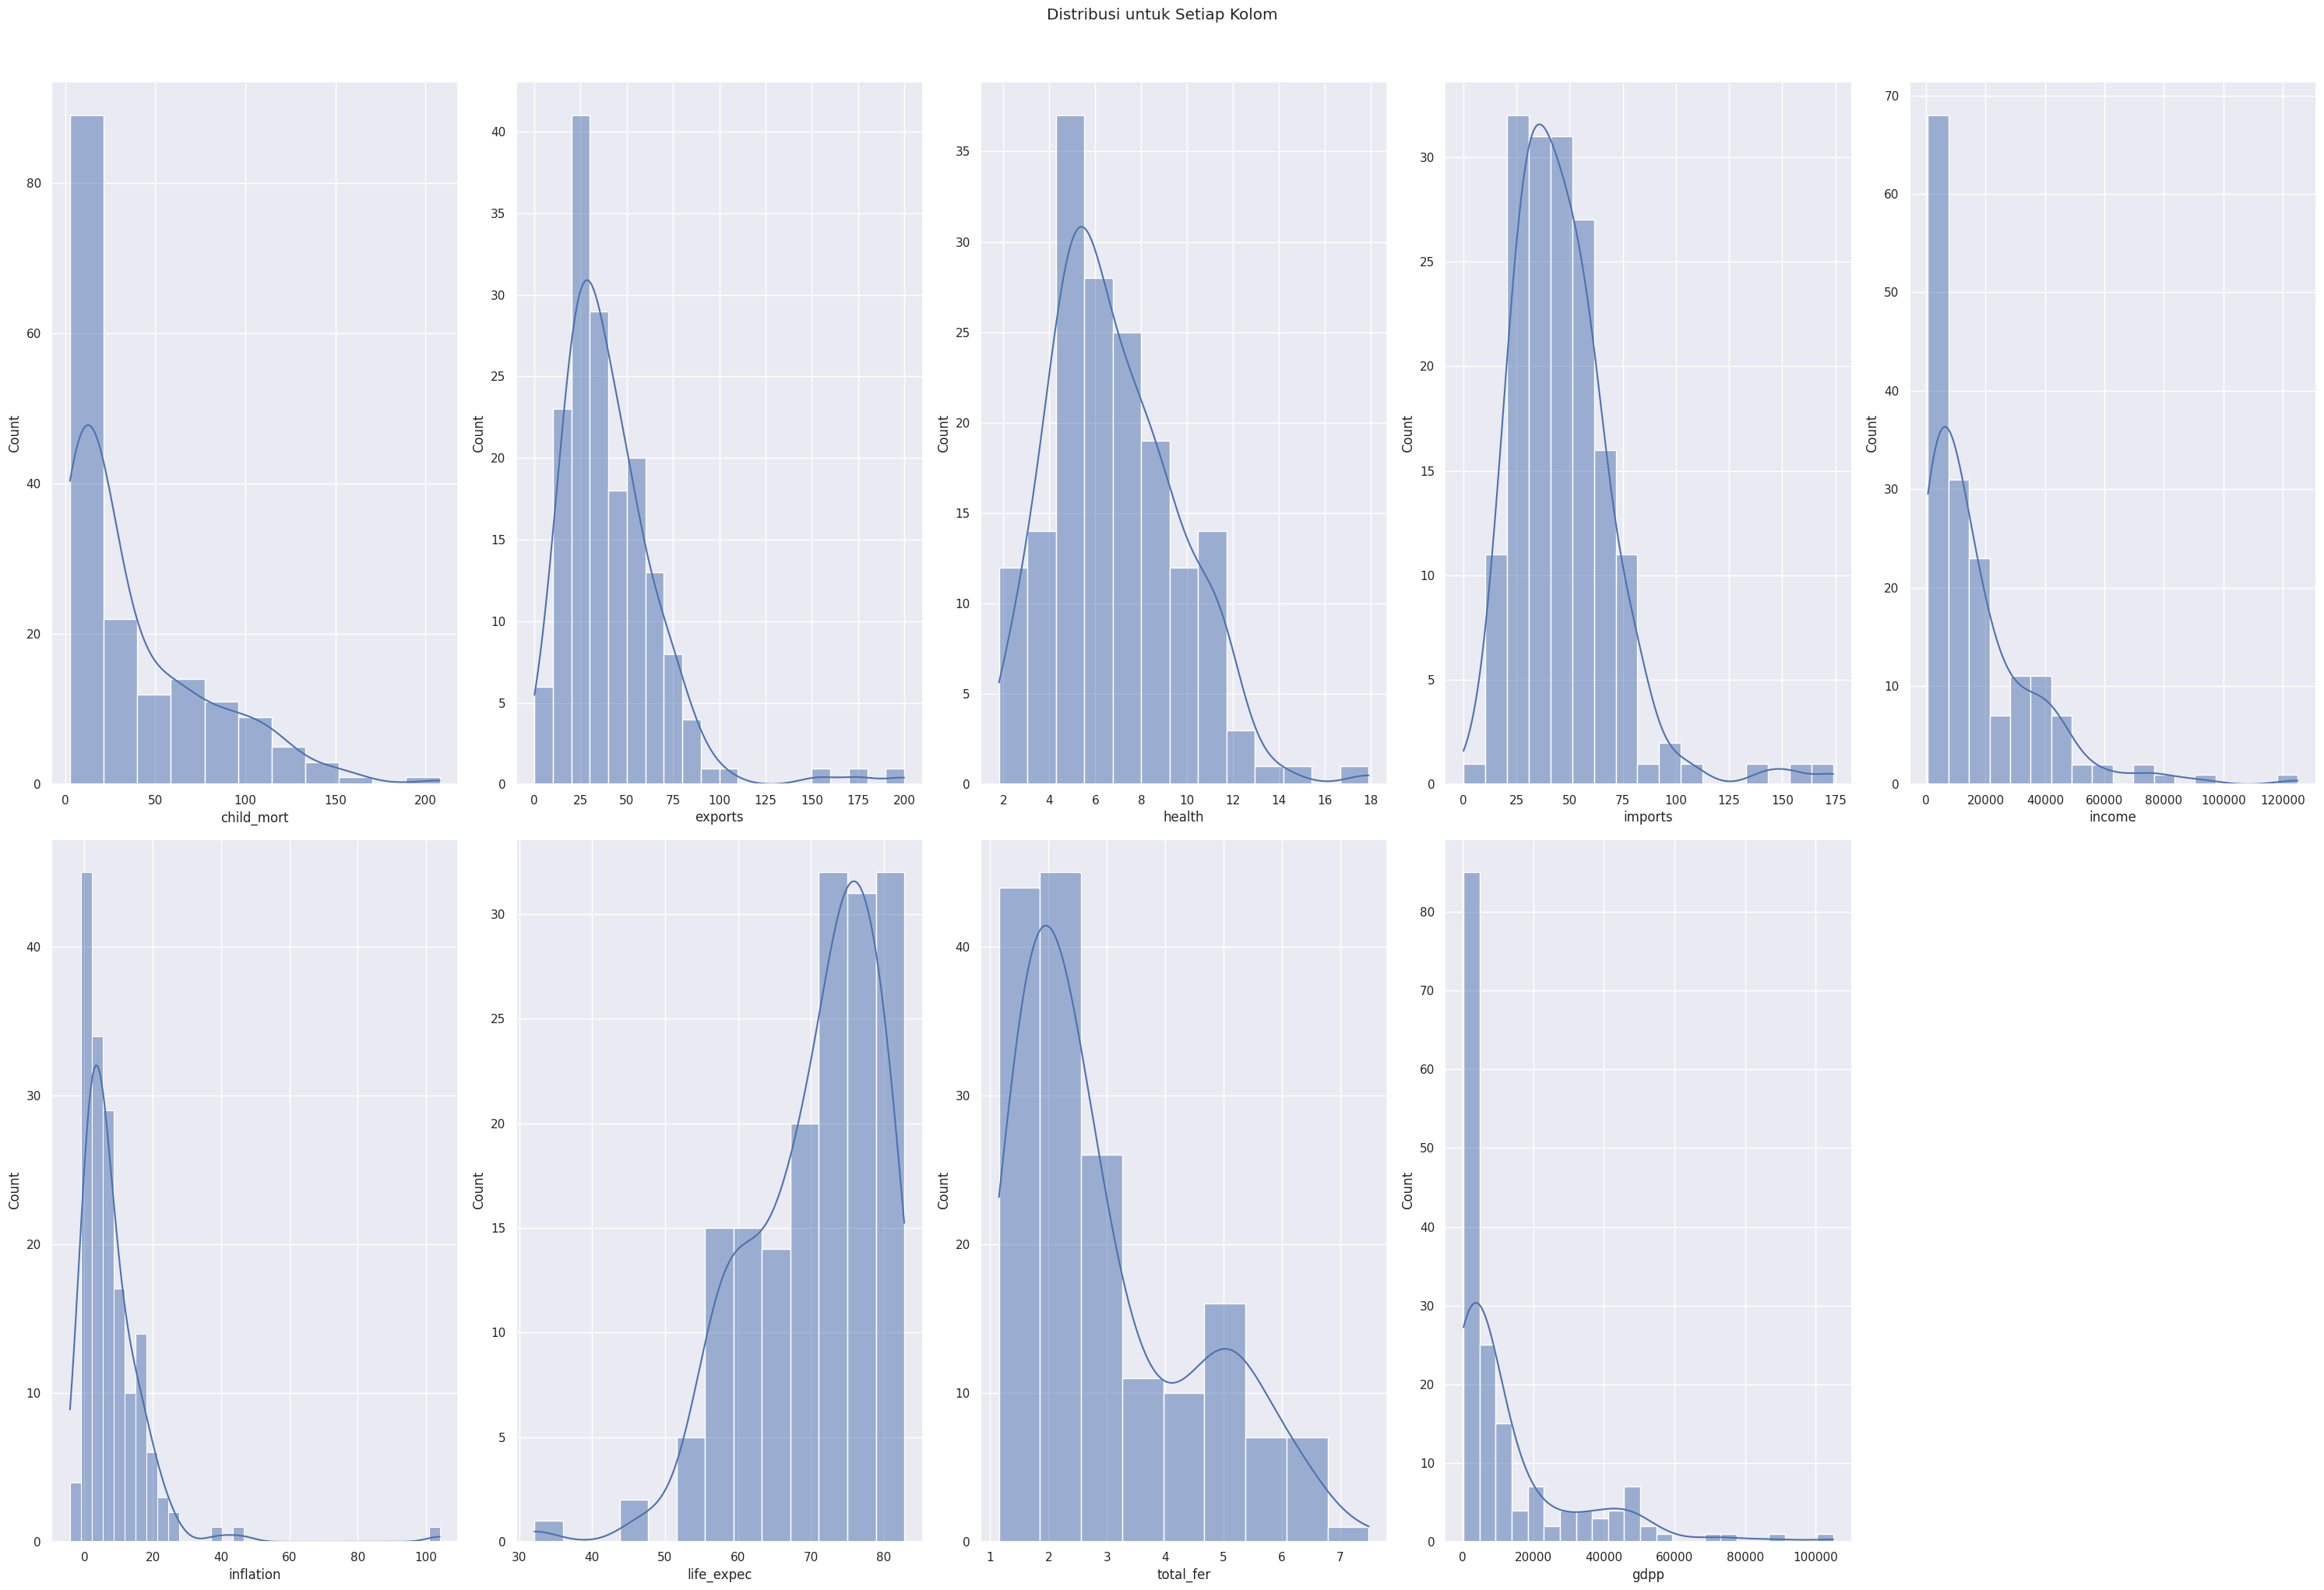

In [10]:
vis = Visualisasi(data_fitur)
vis.distribusi()

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/klasterisasi_negara/utils/EDA.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


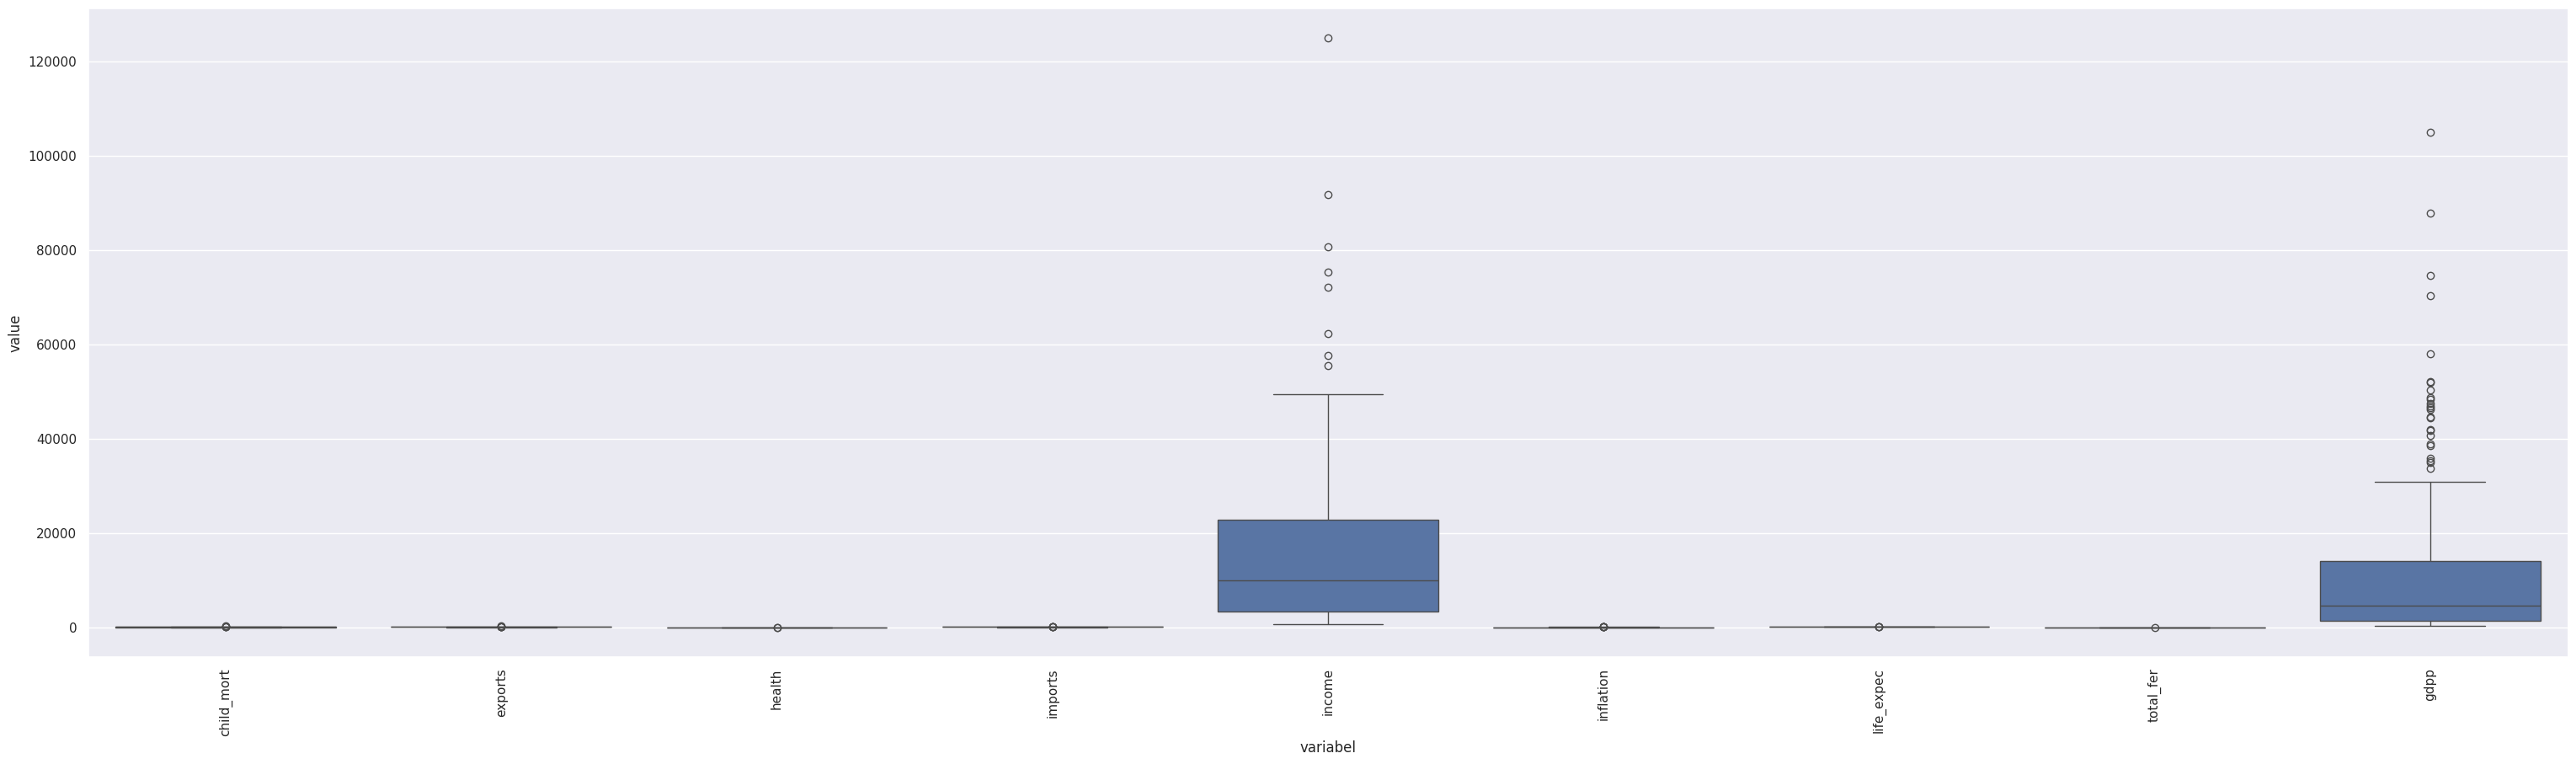

In [11]:
vis.box_plot(data_fitur.columns)

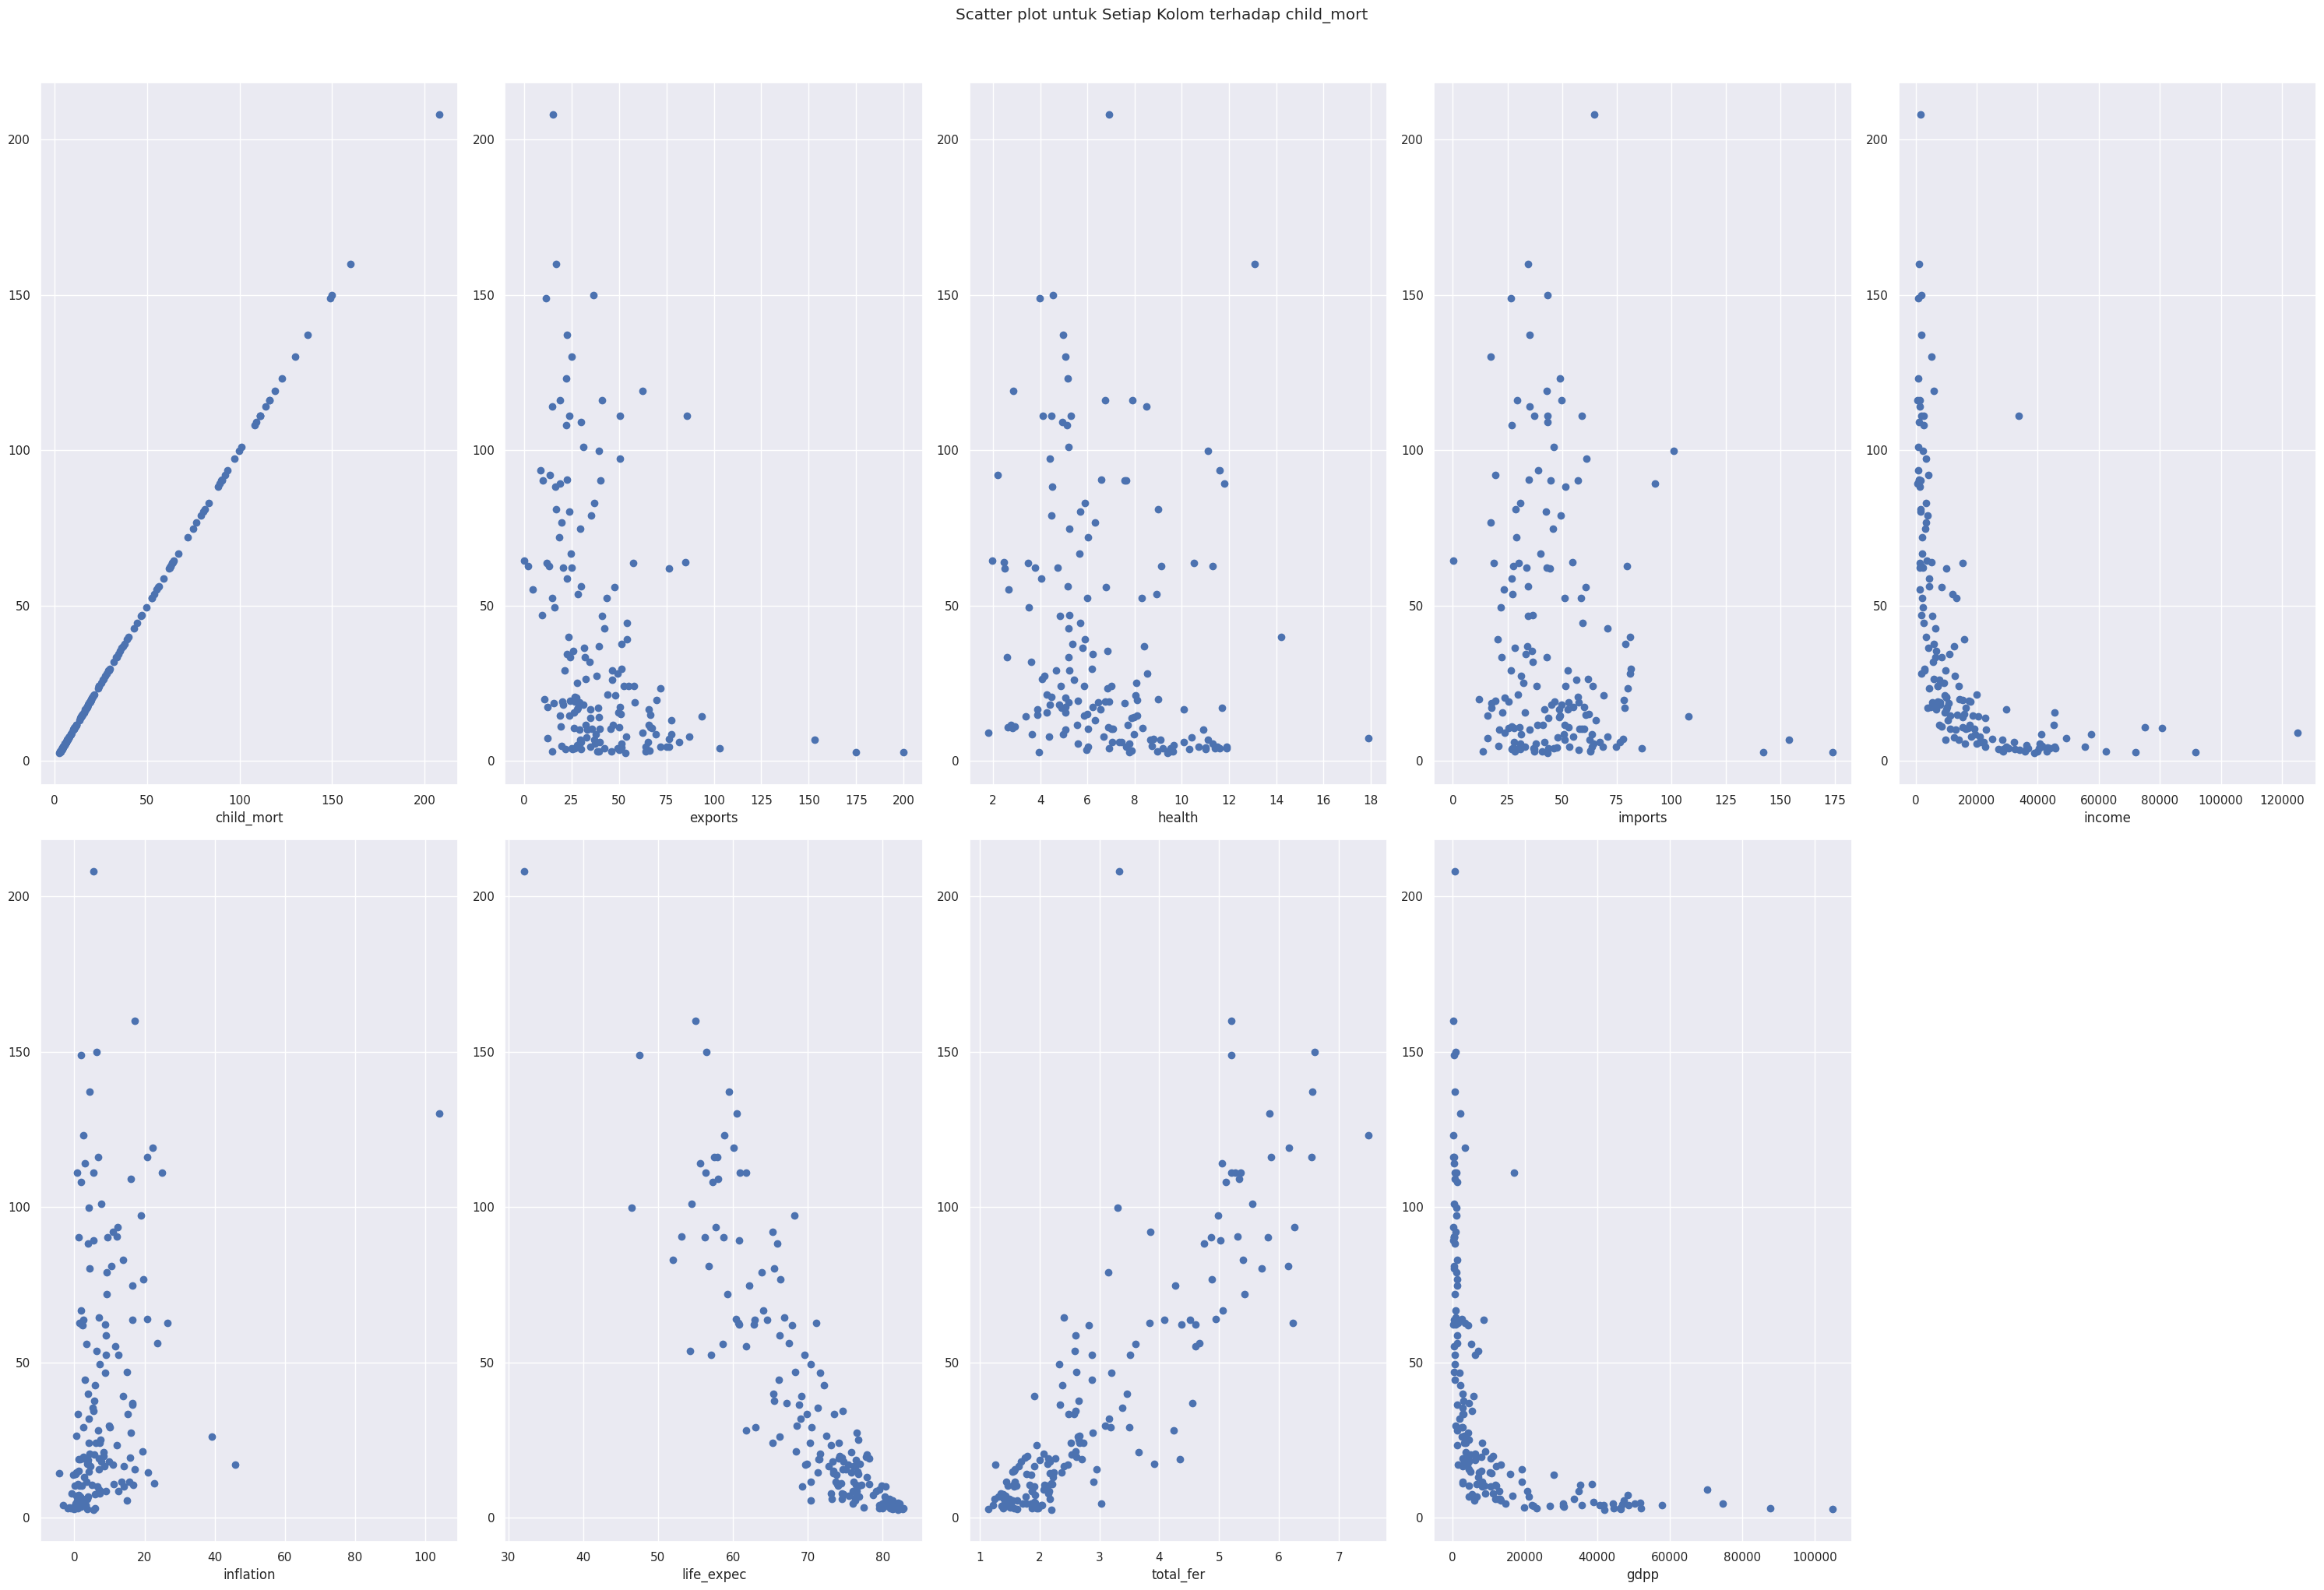

In [12]:
vis.scatter("child_mort").show()

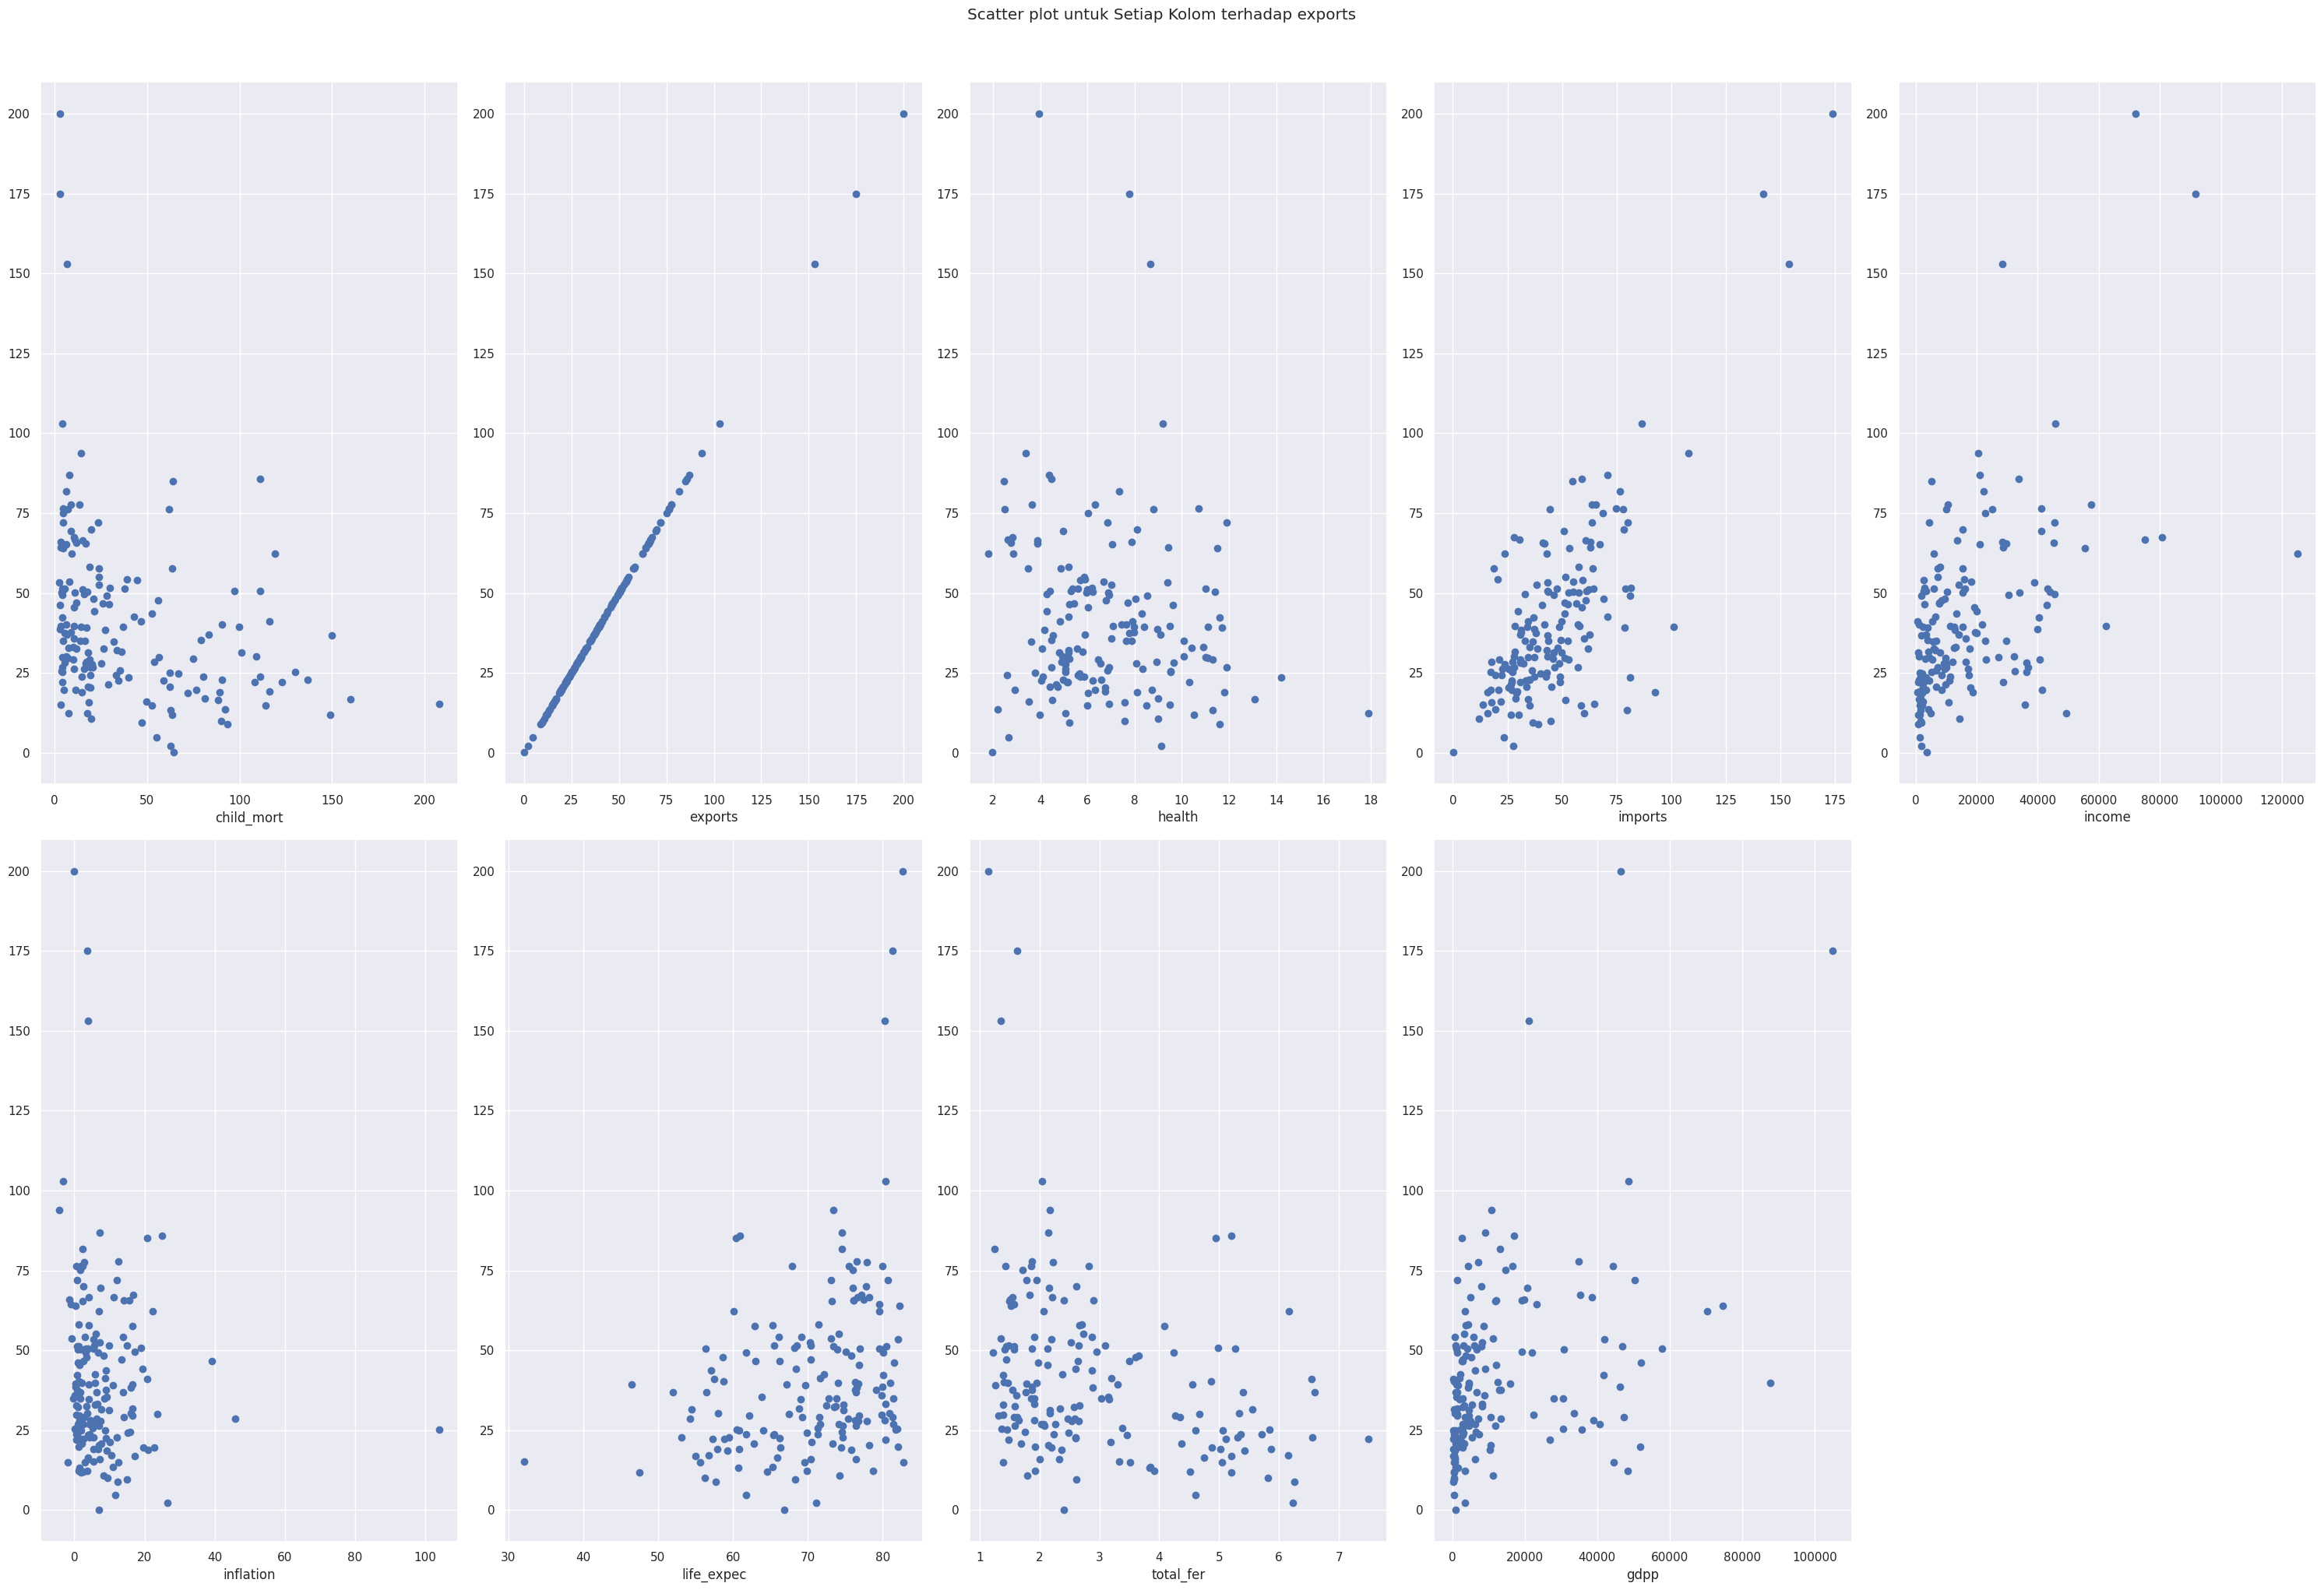

In [13]:
vis.scatter("exports").show()

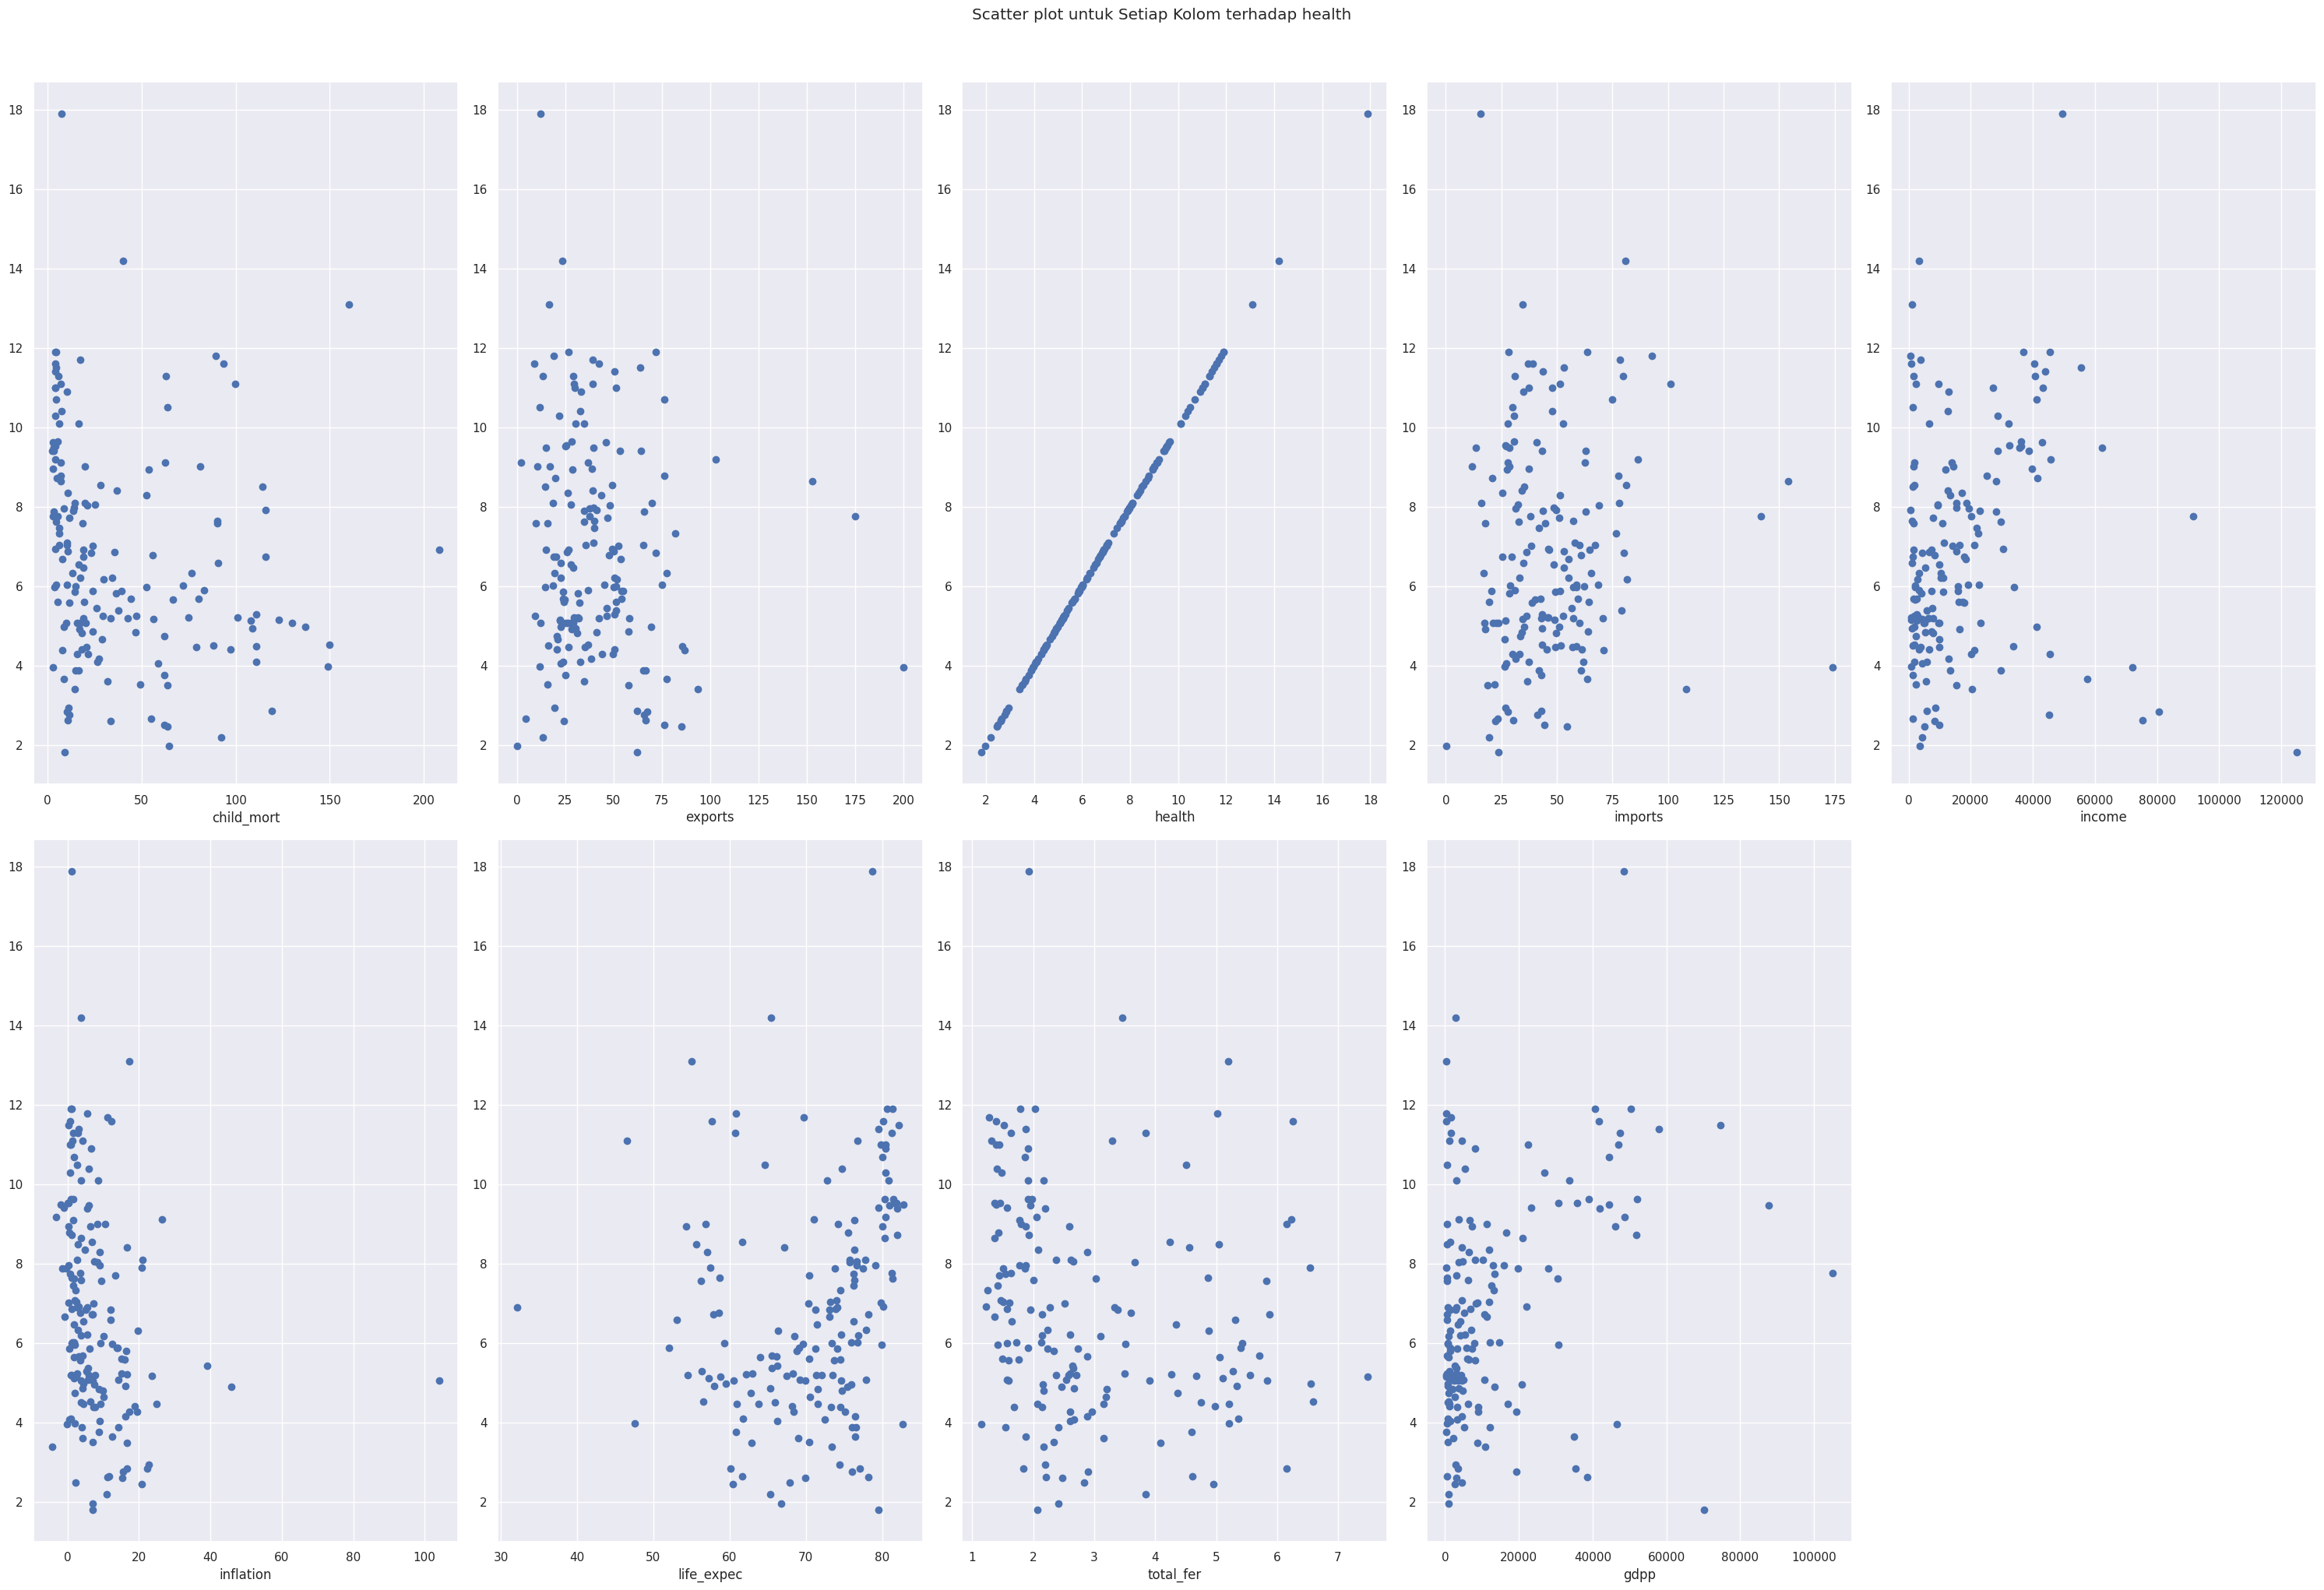

In [14]:
vis.scatter("health").show()

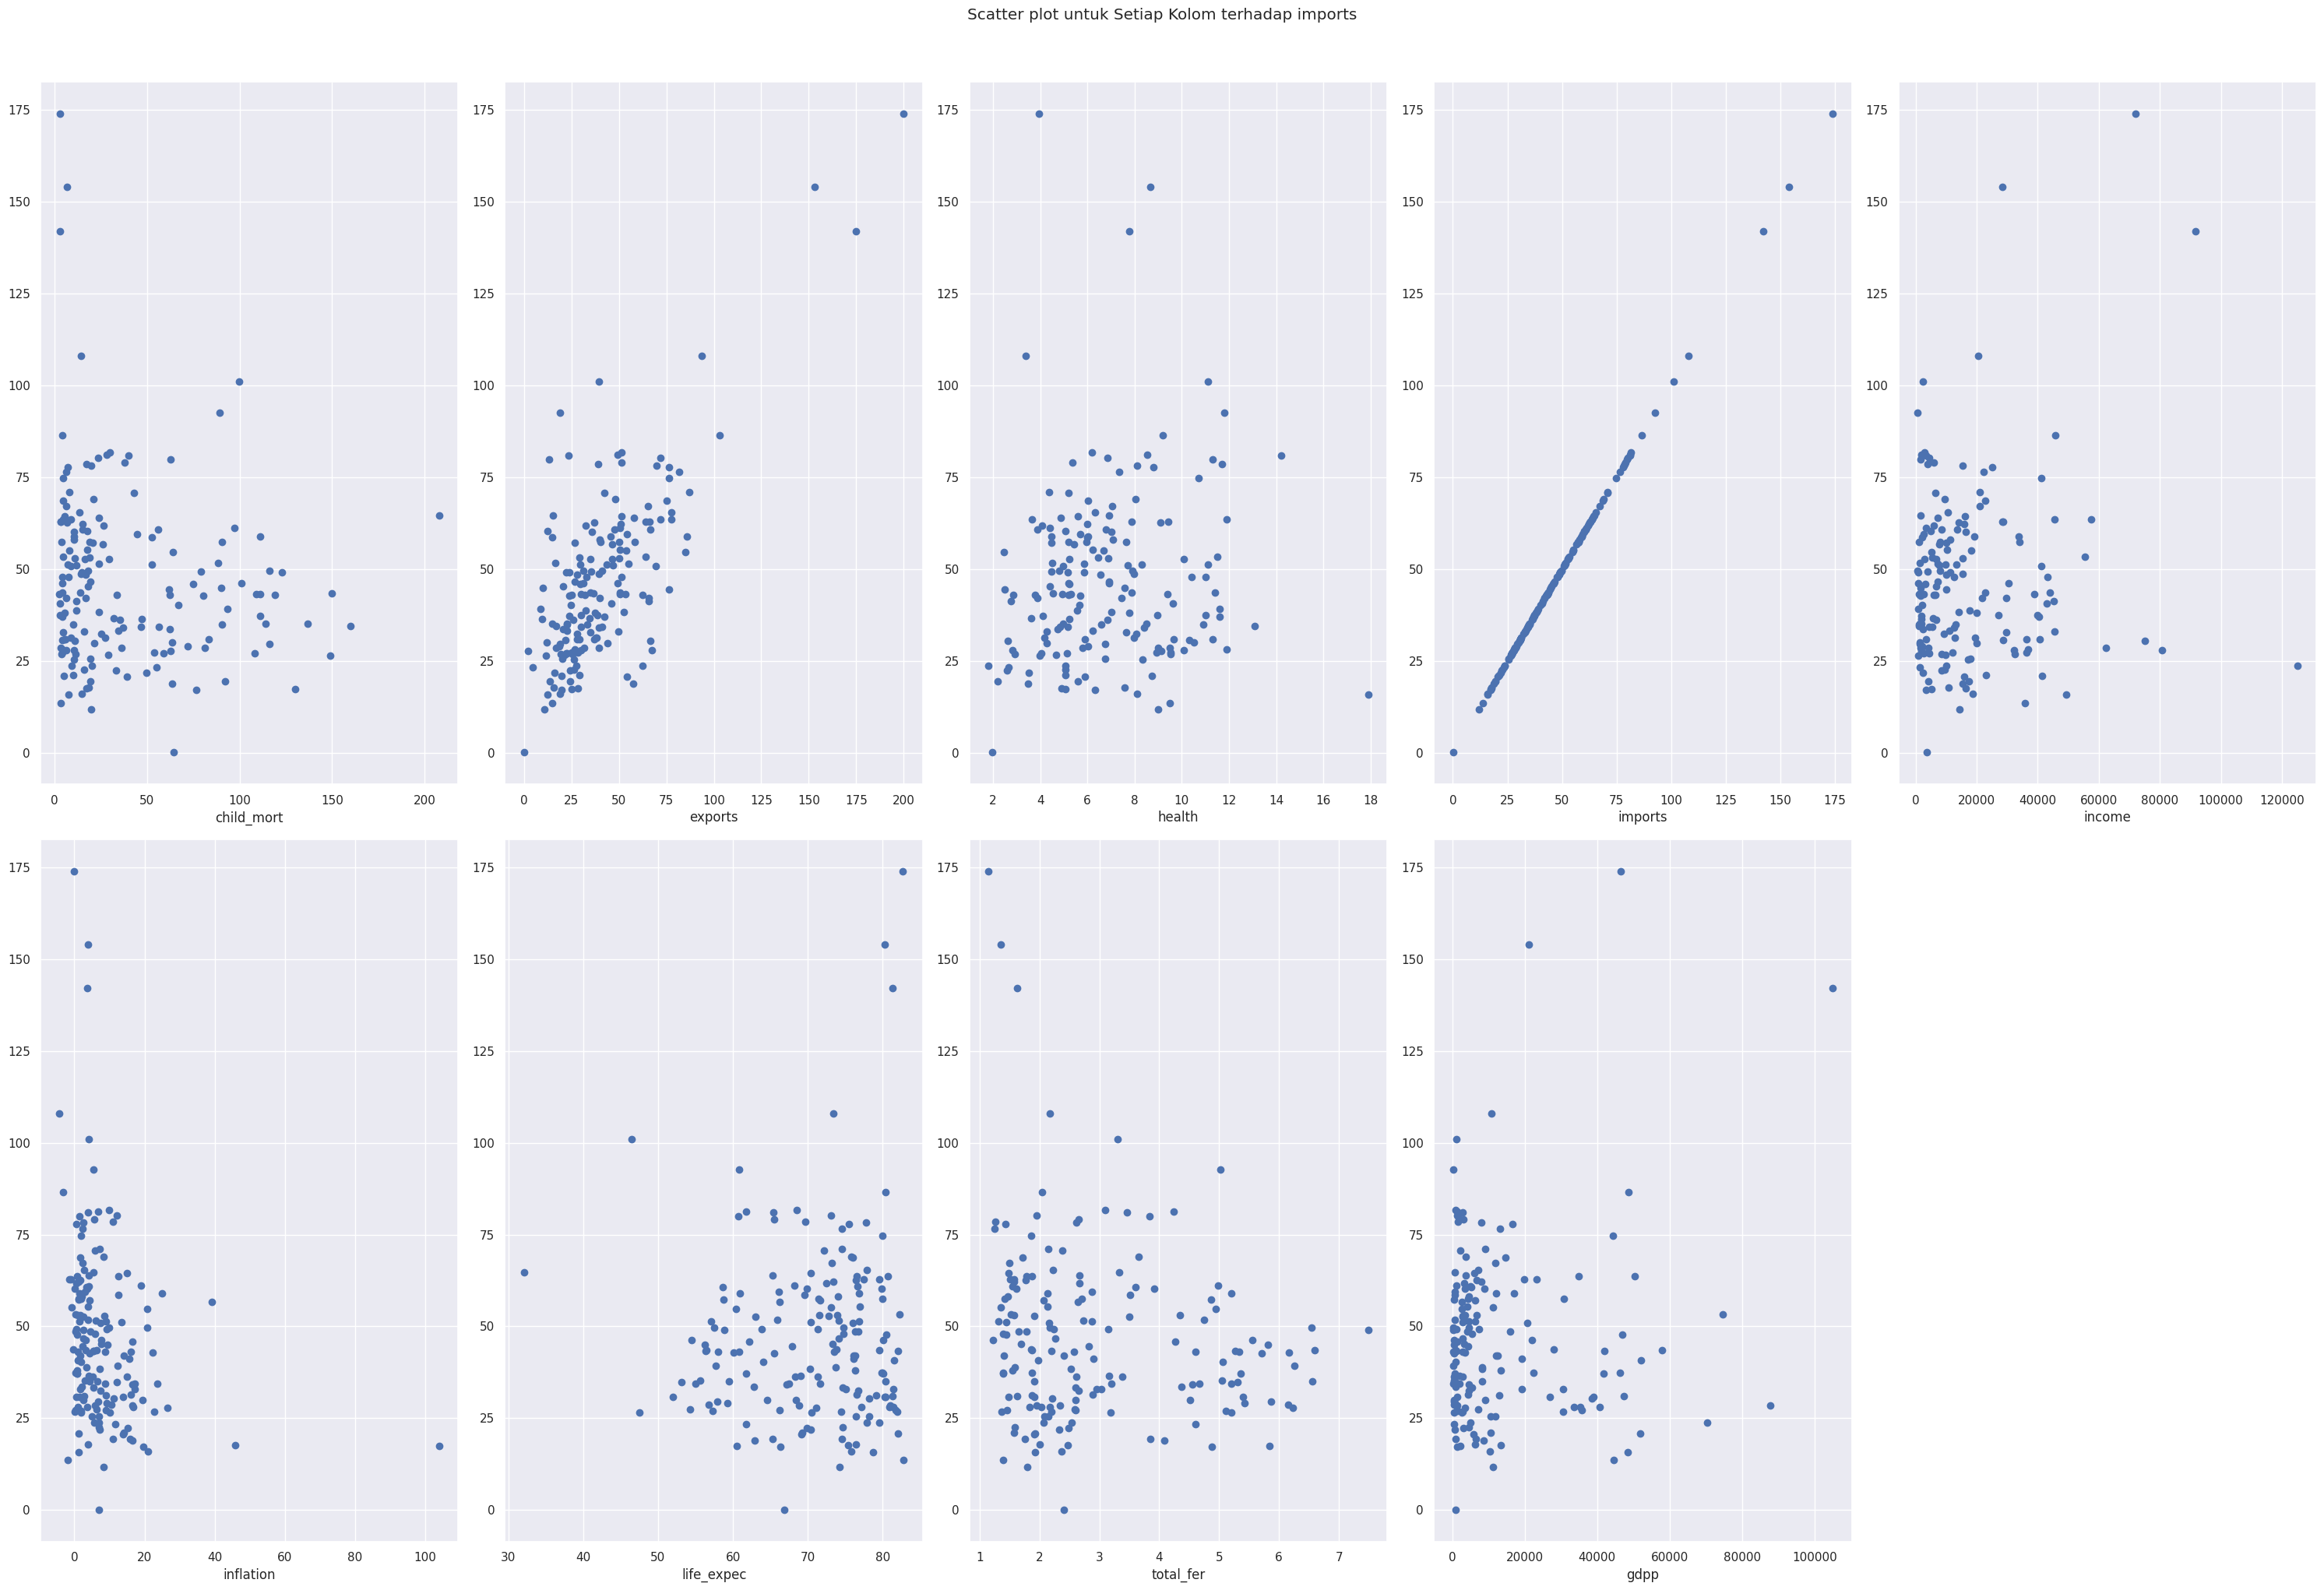

In [15]:
vis.scatter("imports").show()

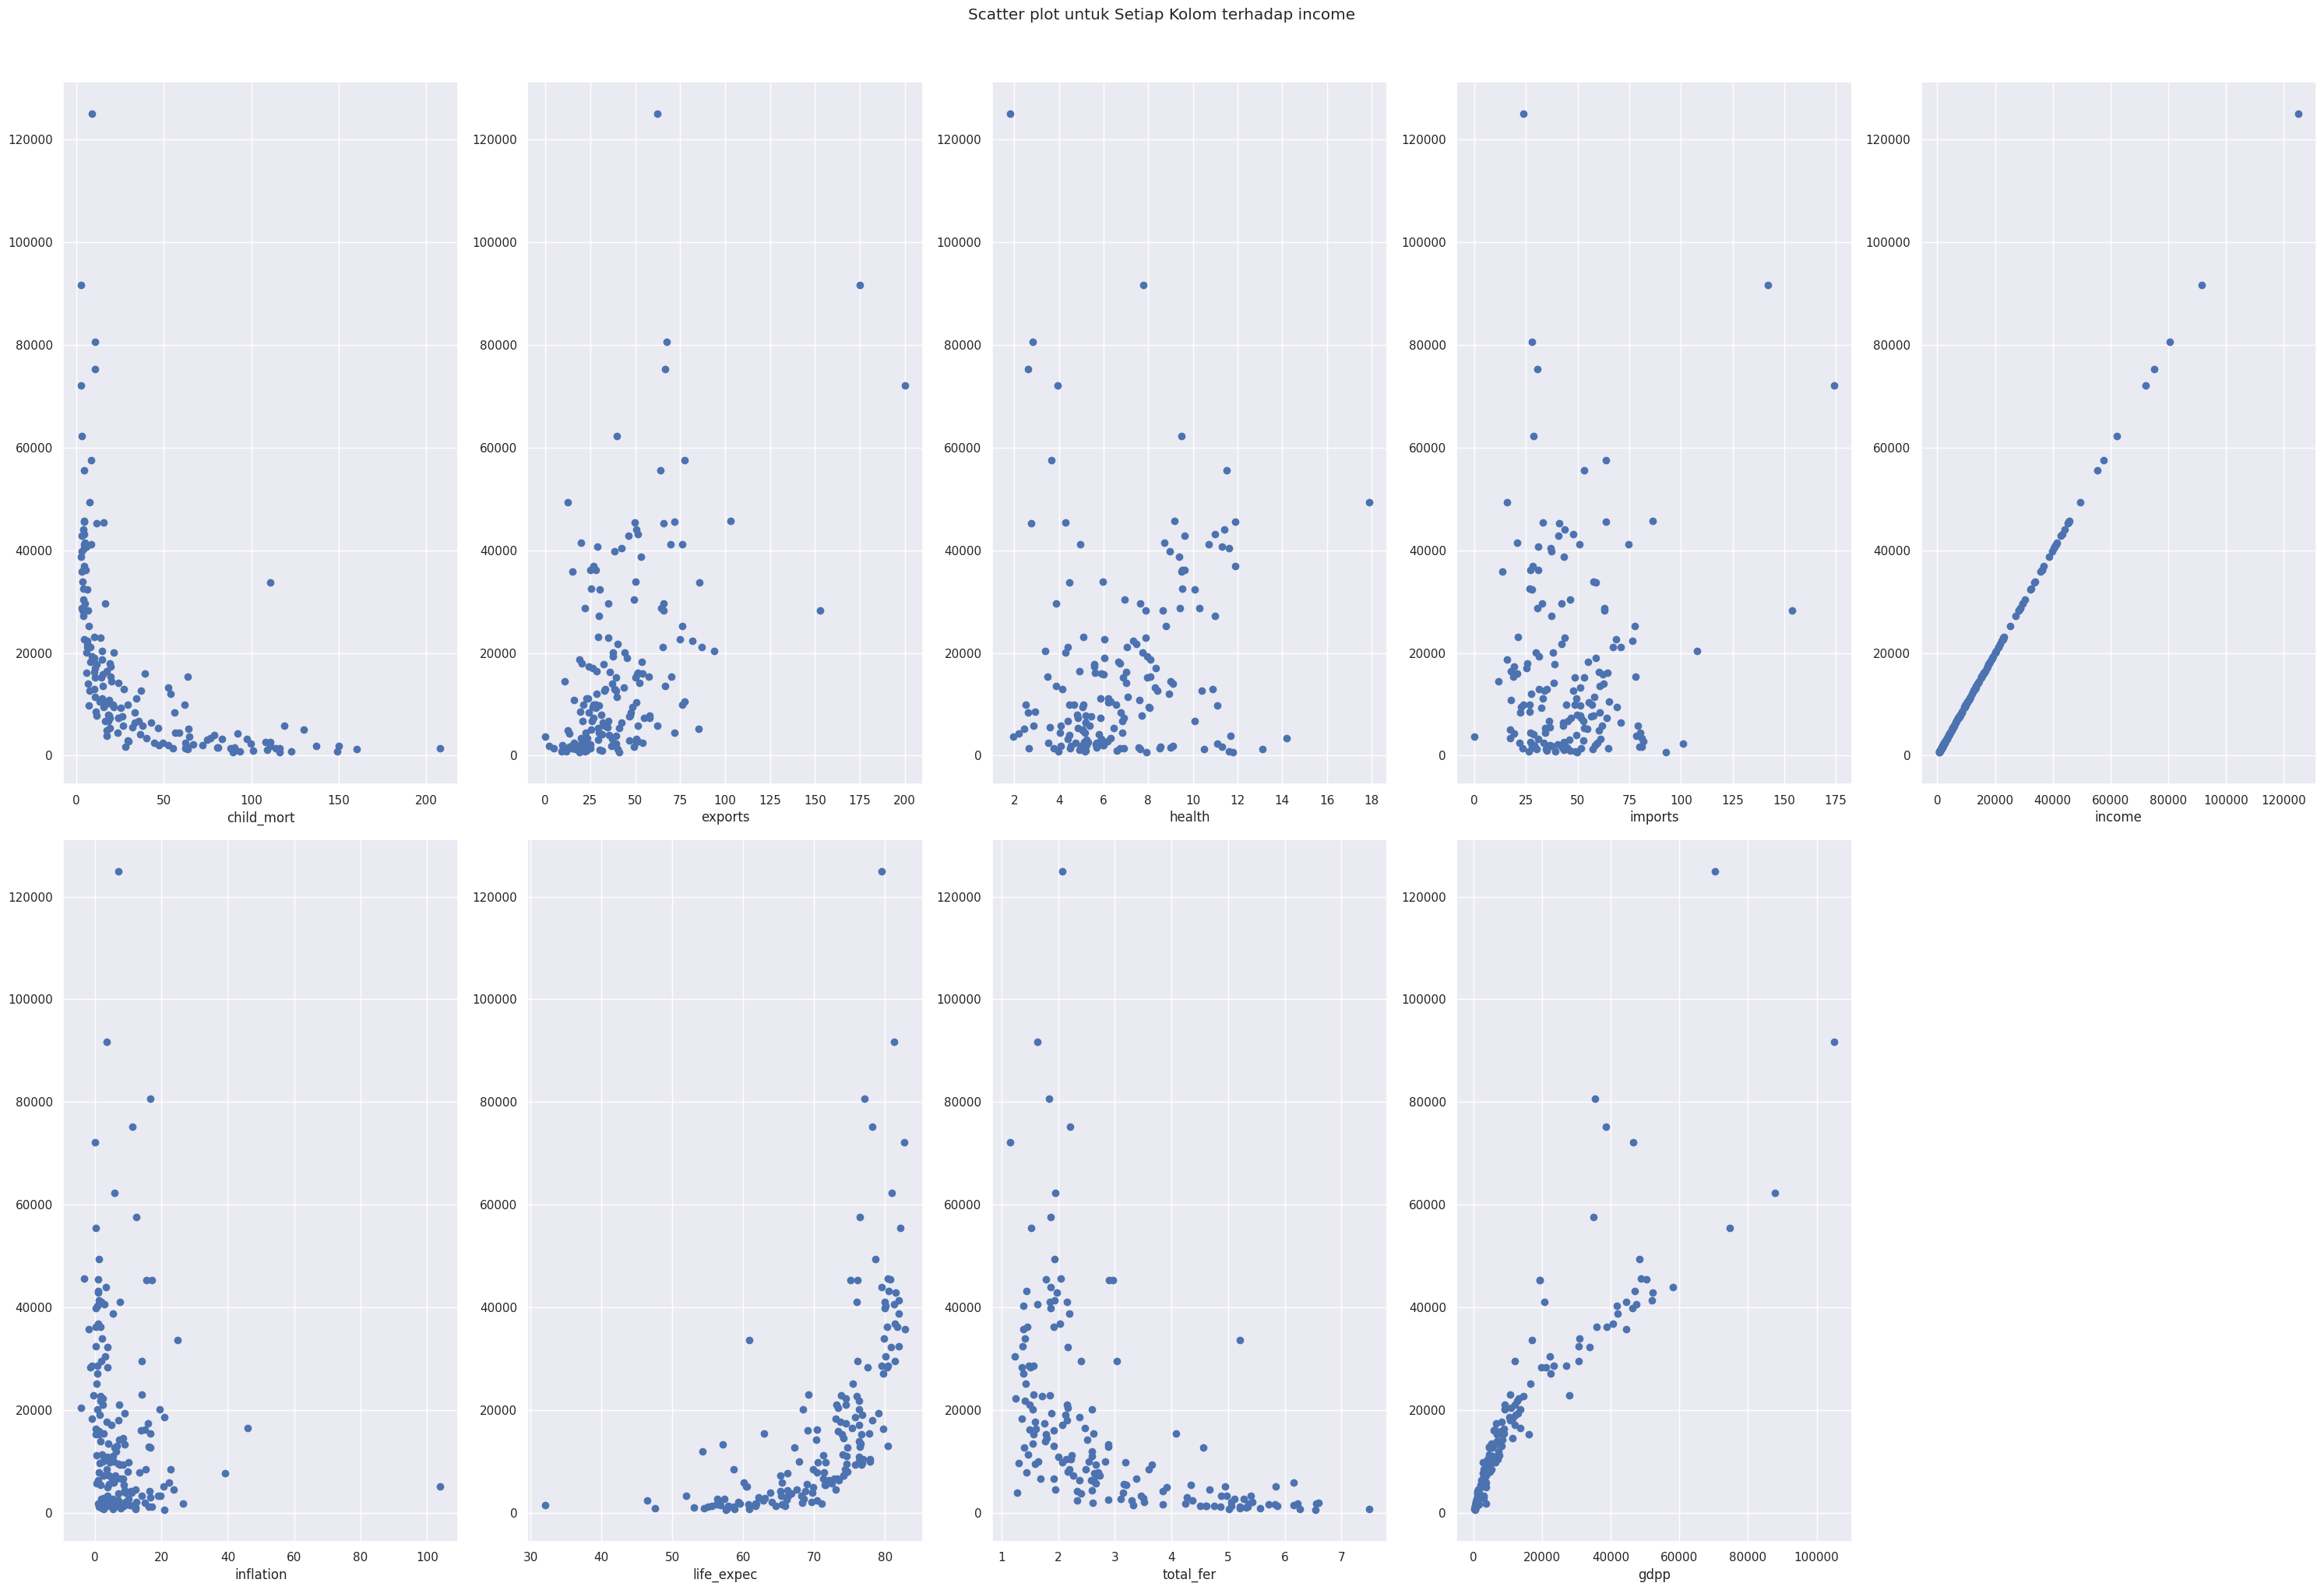

In [16]:
vis.scatter("income").show()

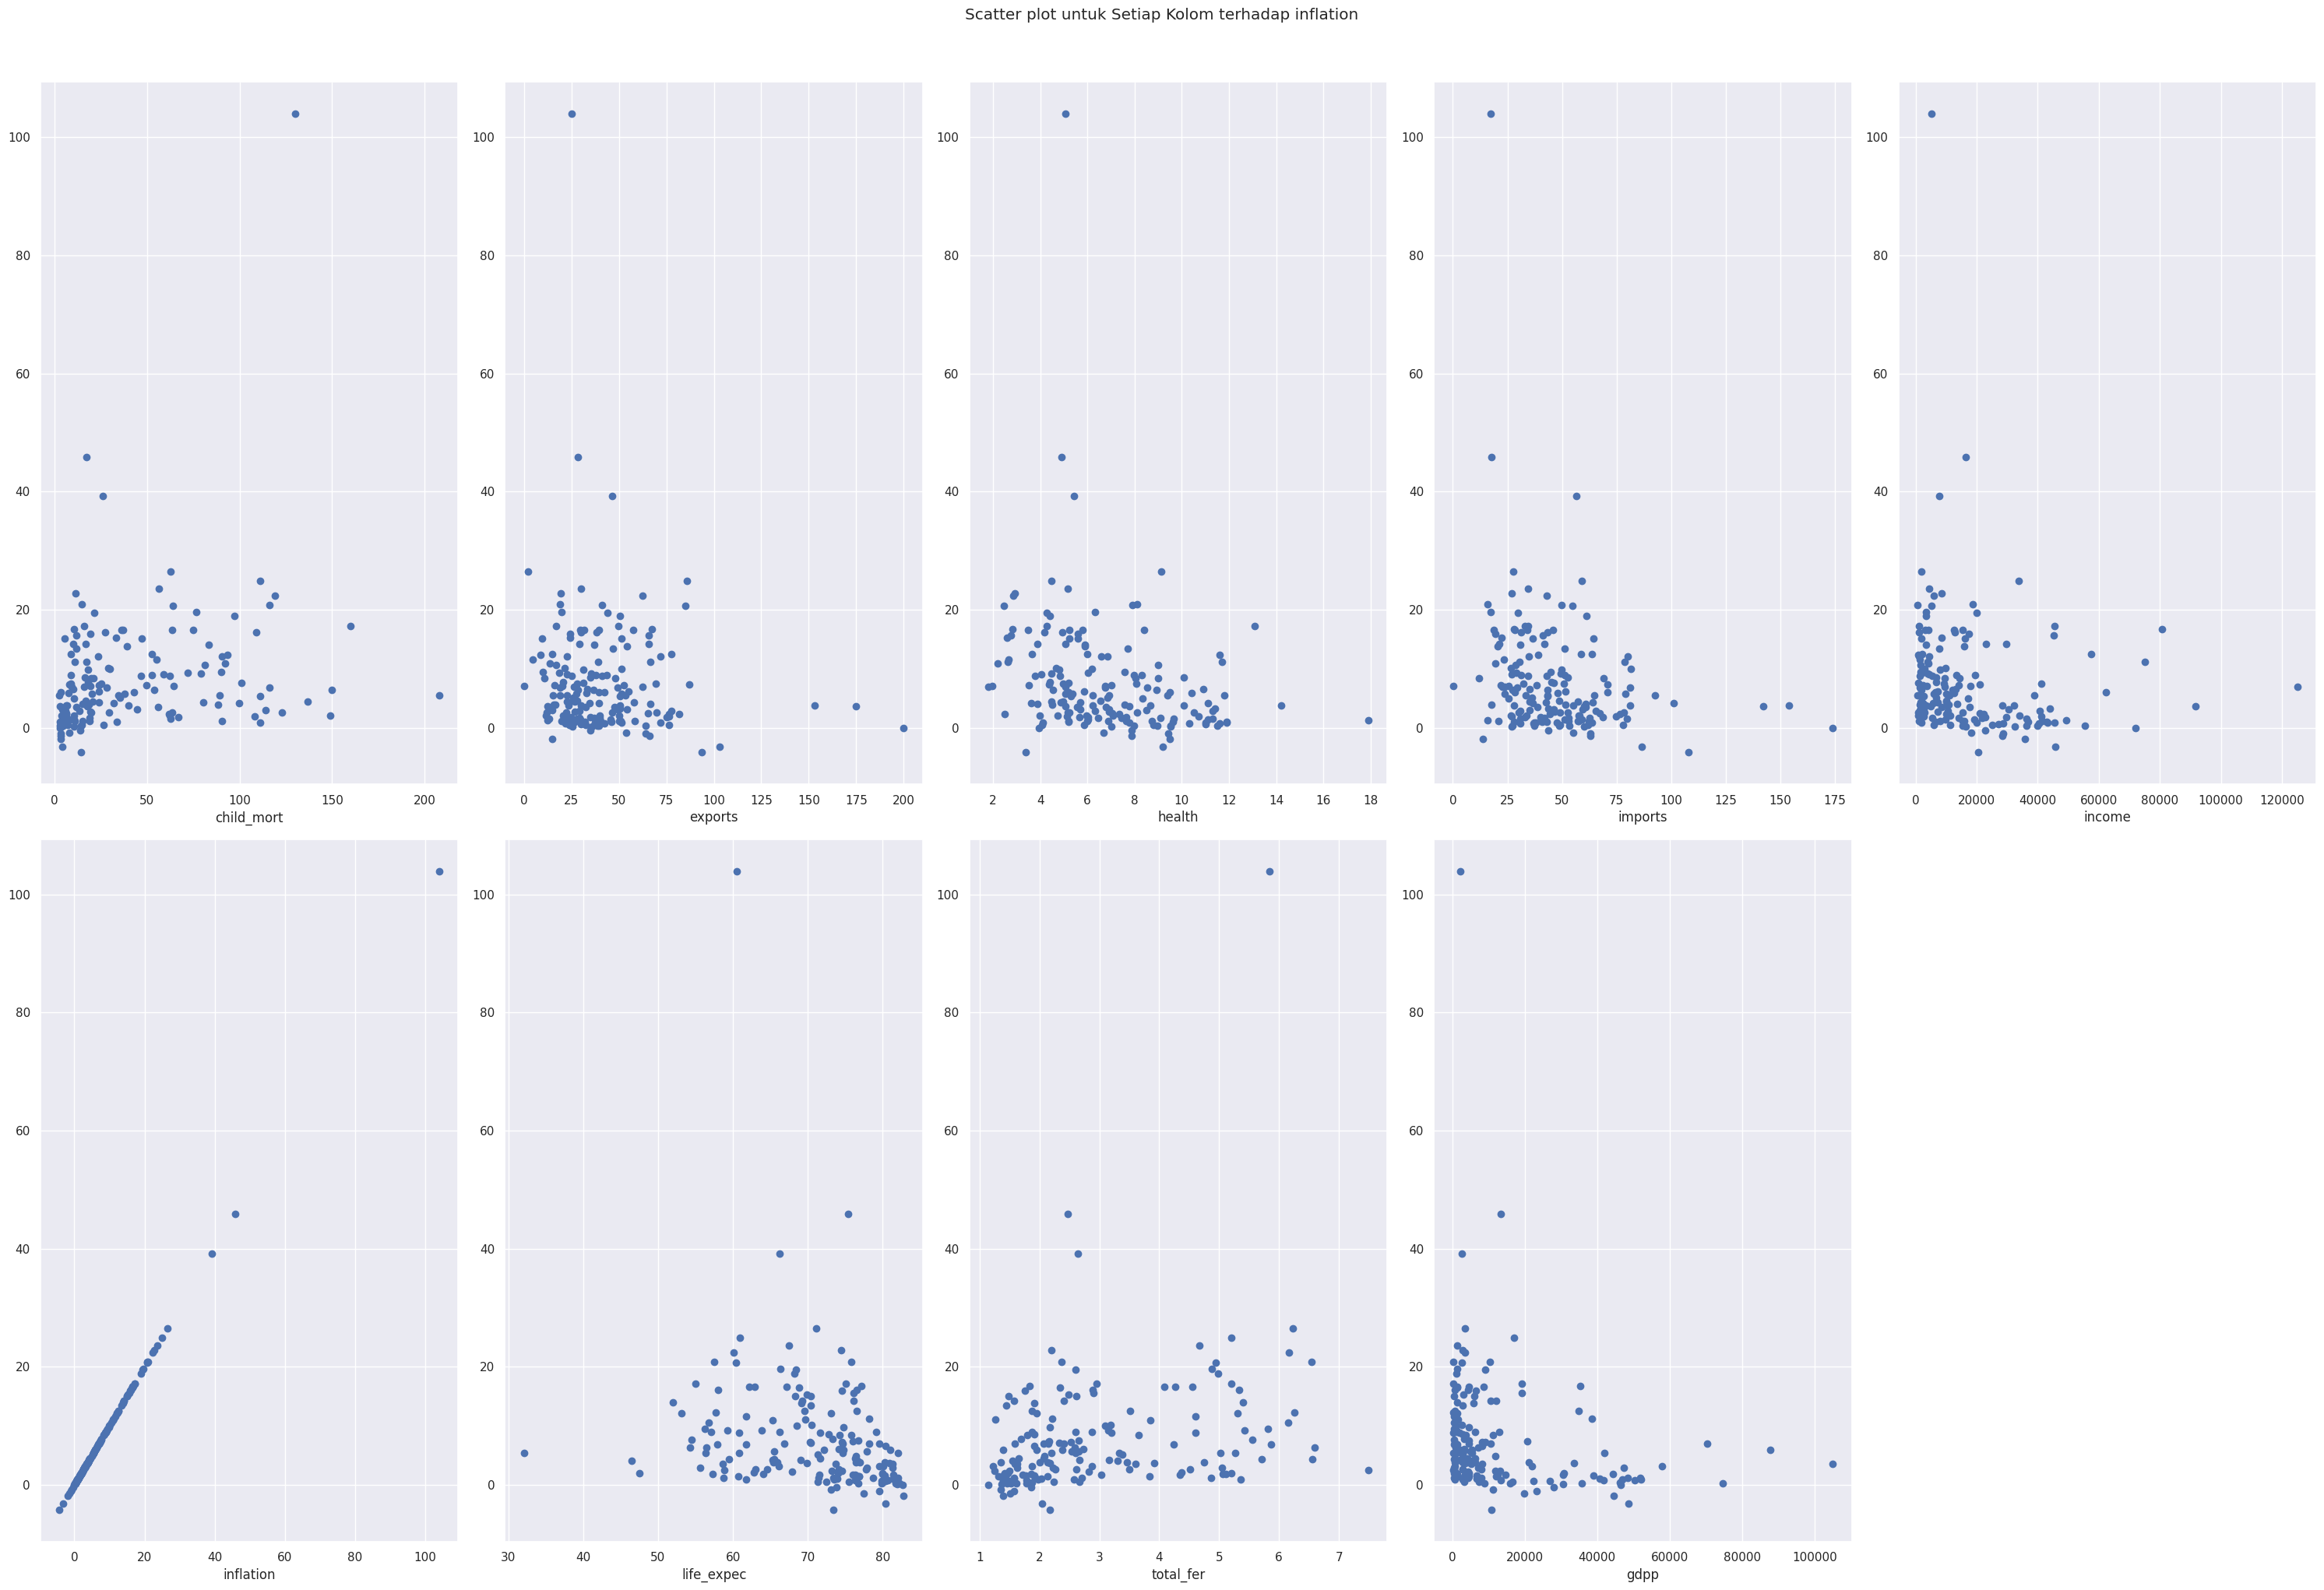

In [17]:
vis.scatter("inflation").show()

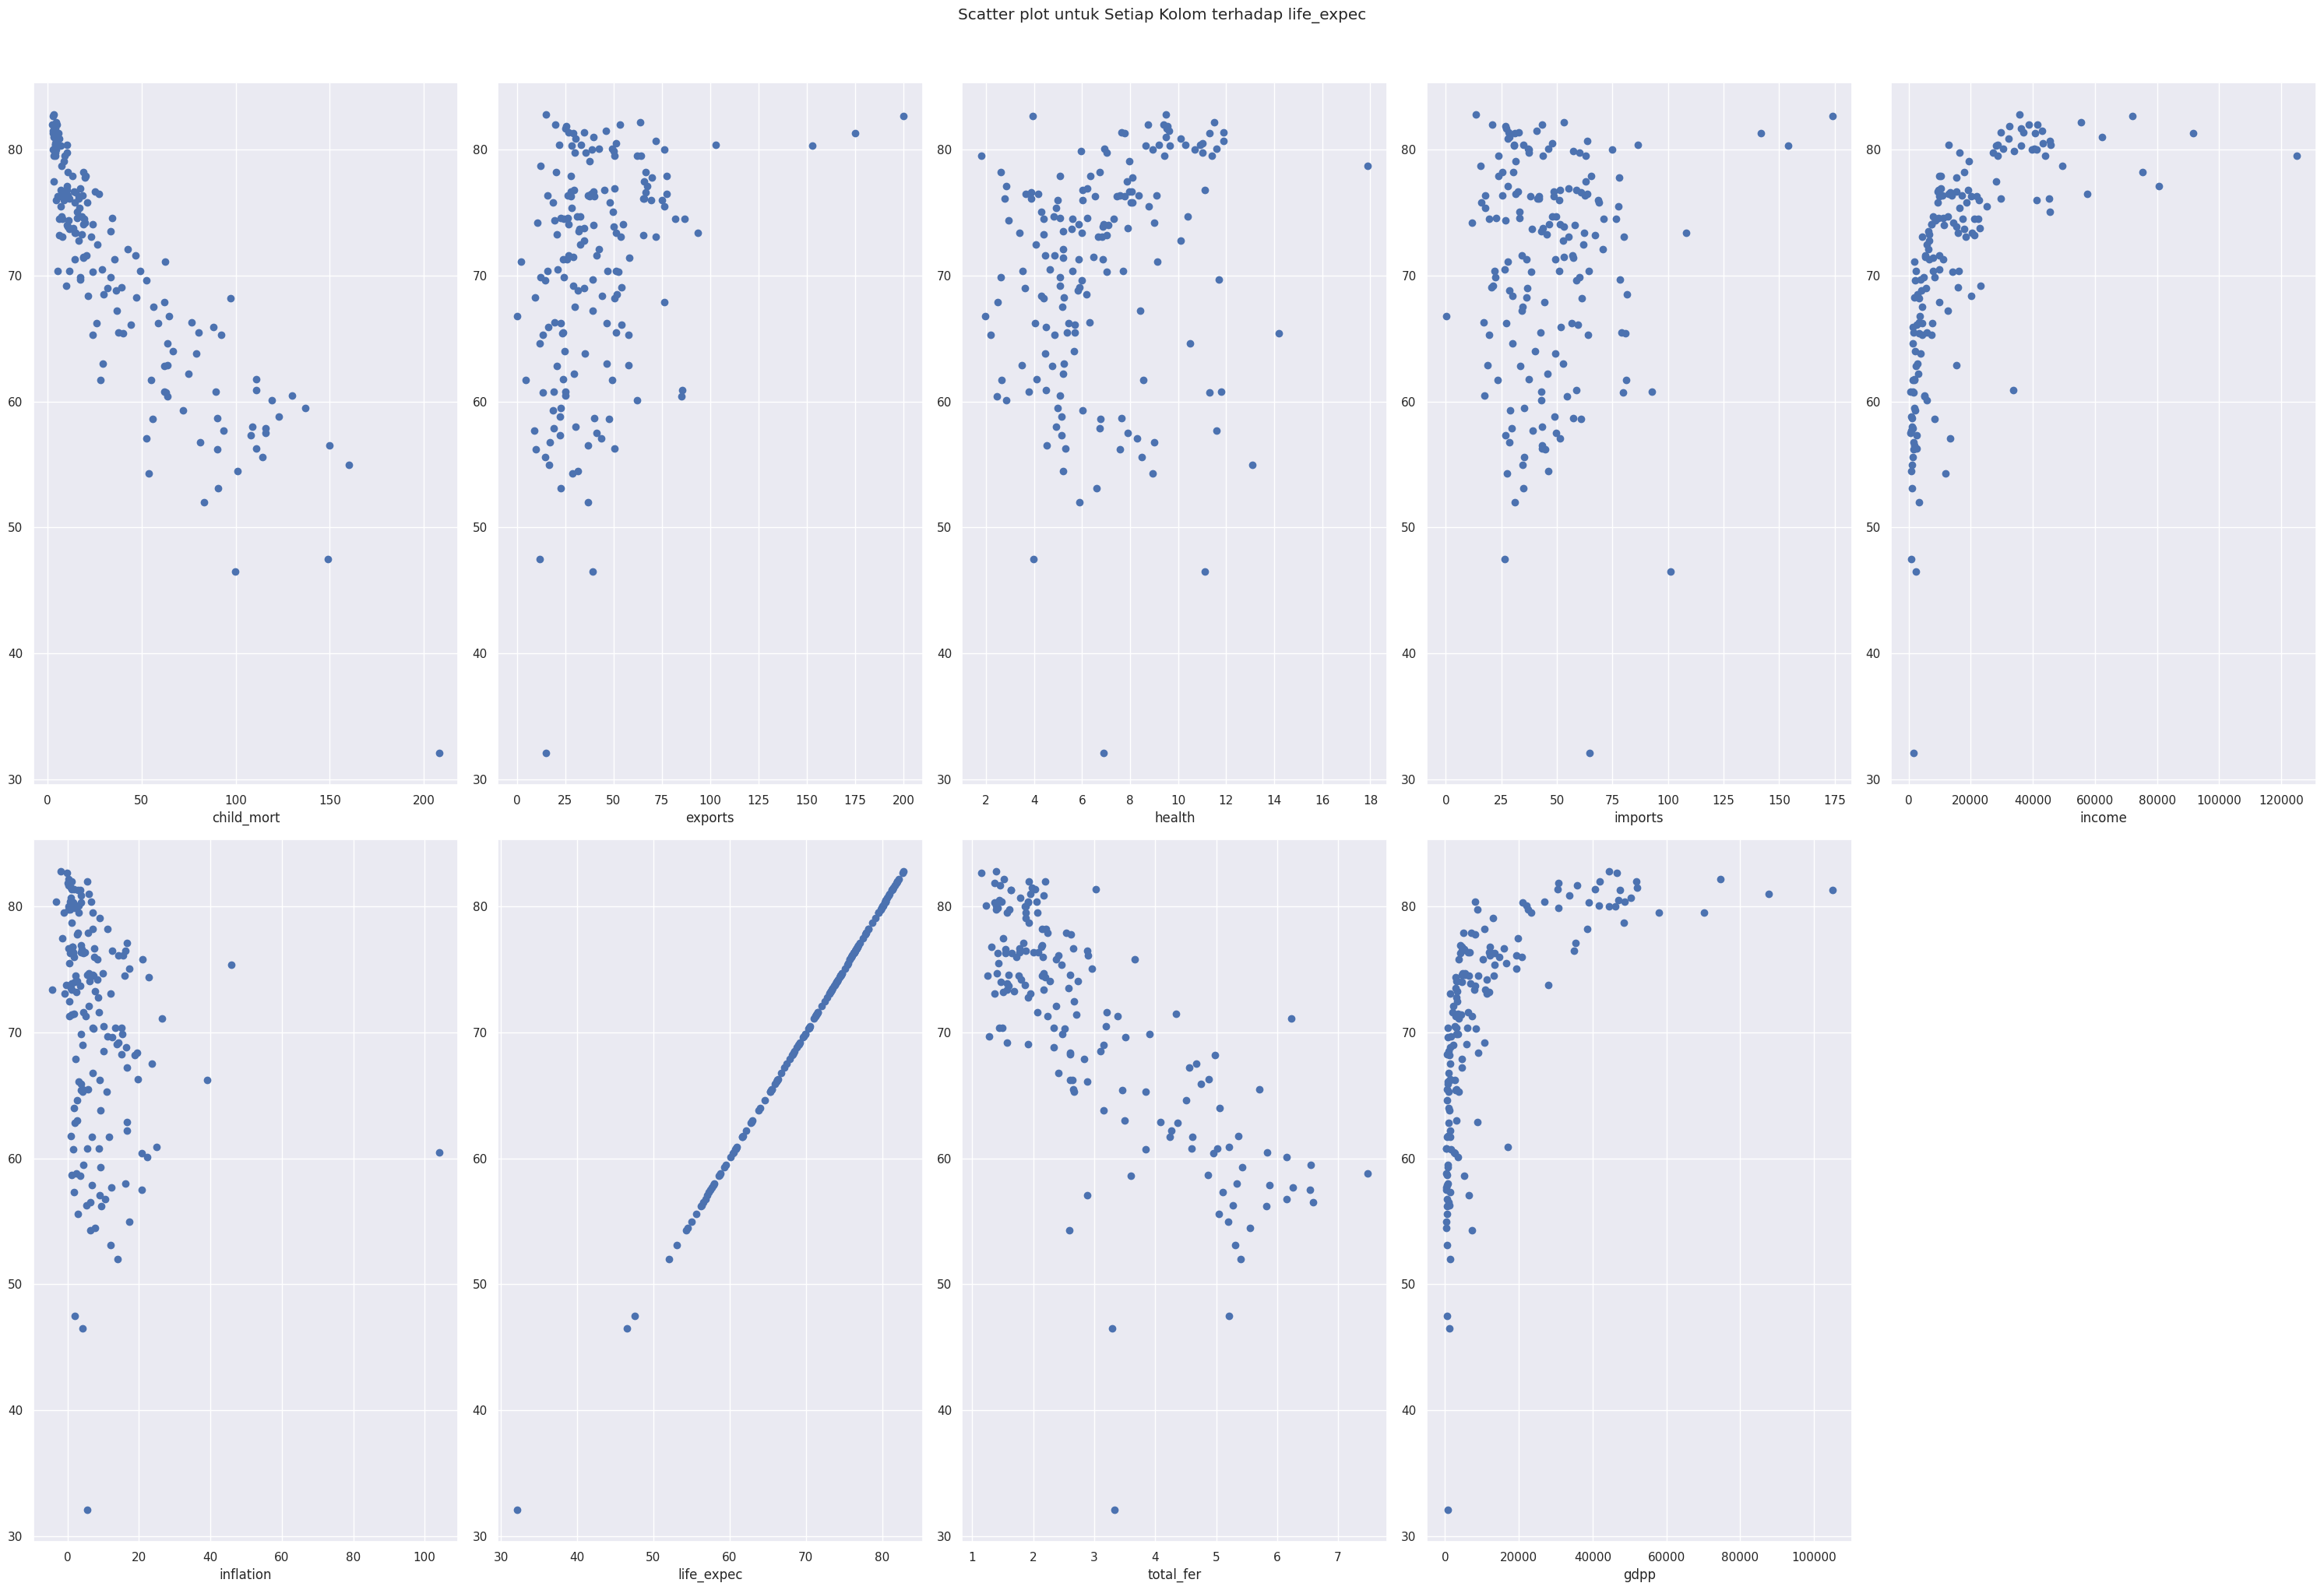

In [18]:
vis.scatter("life_expec").show()

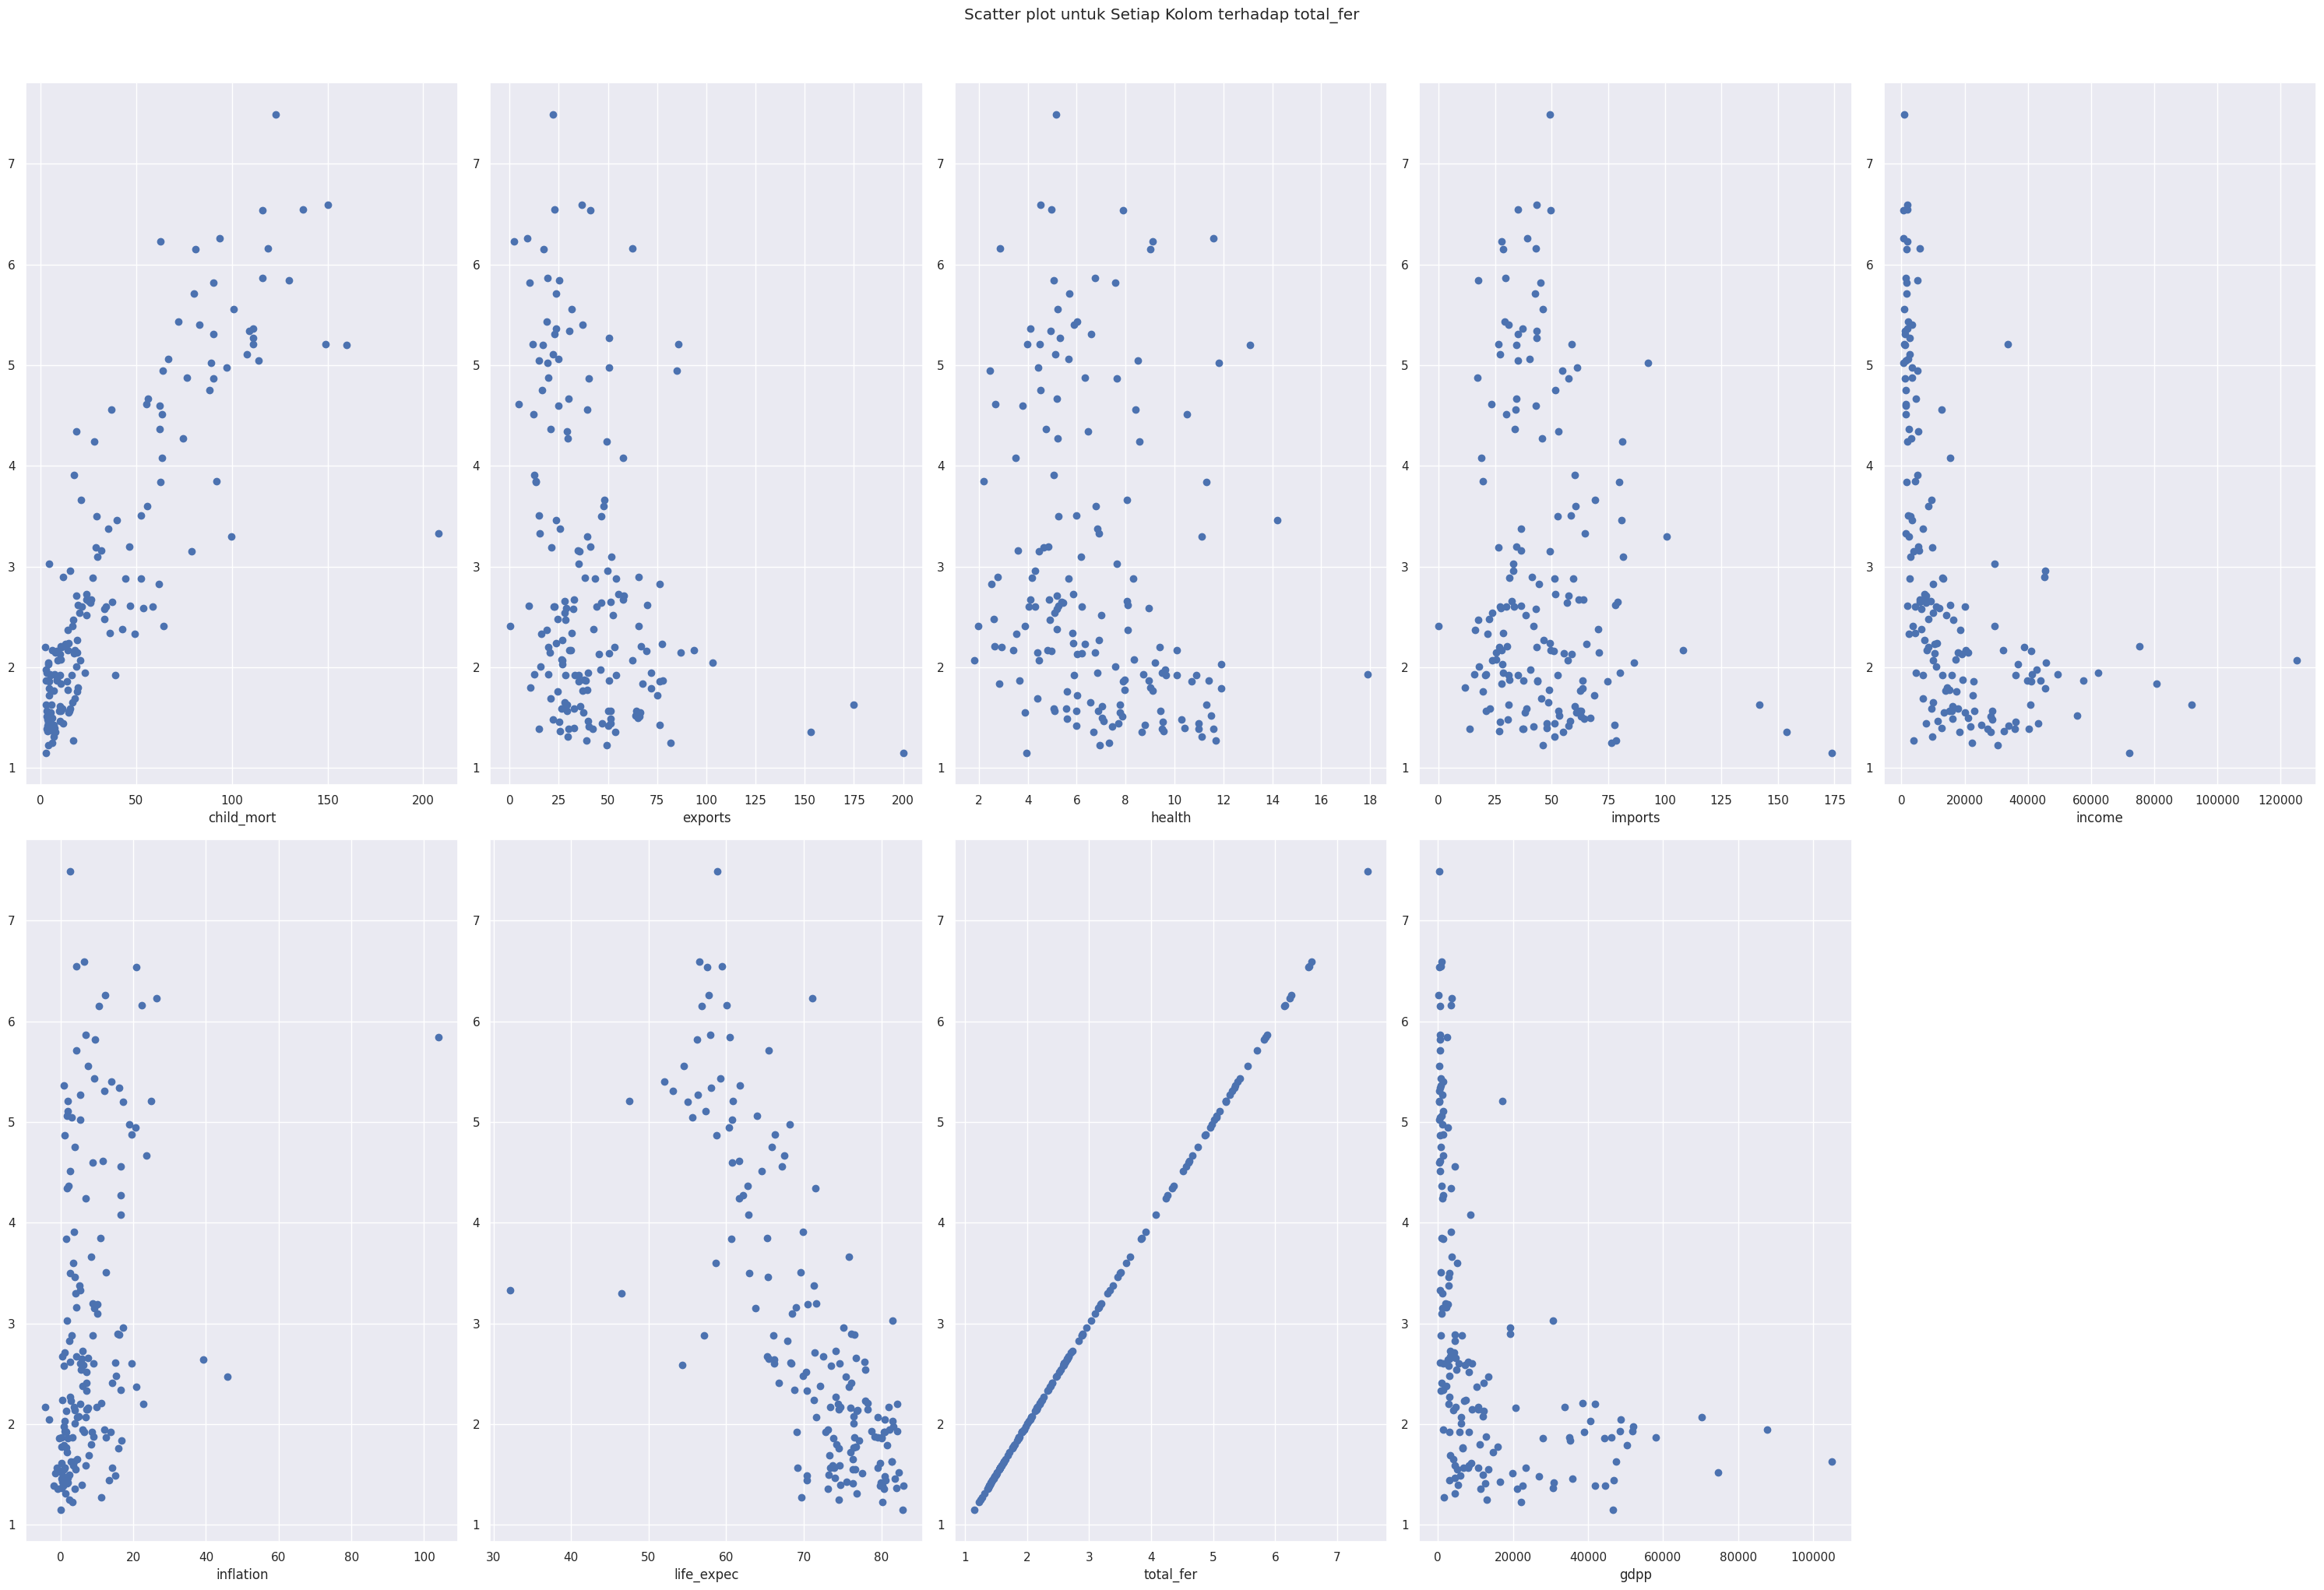

In [19]:
vis.scatter("total_fer").show()

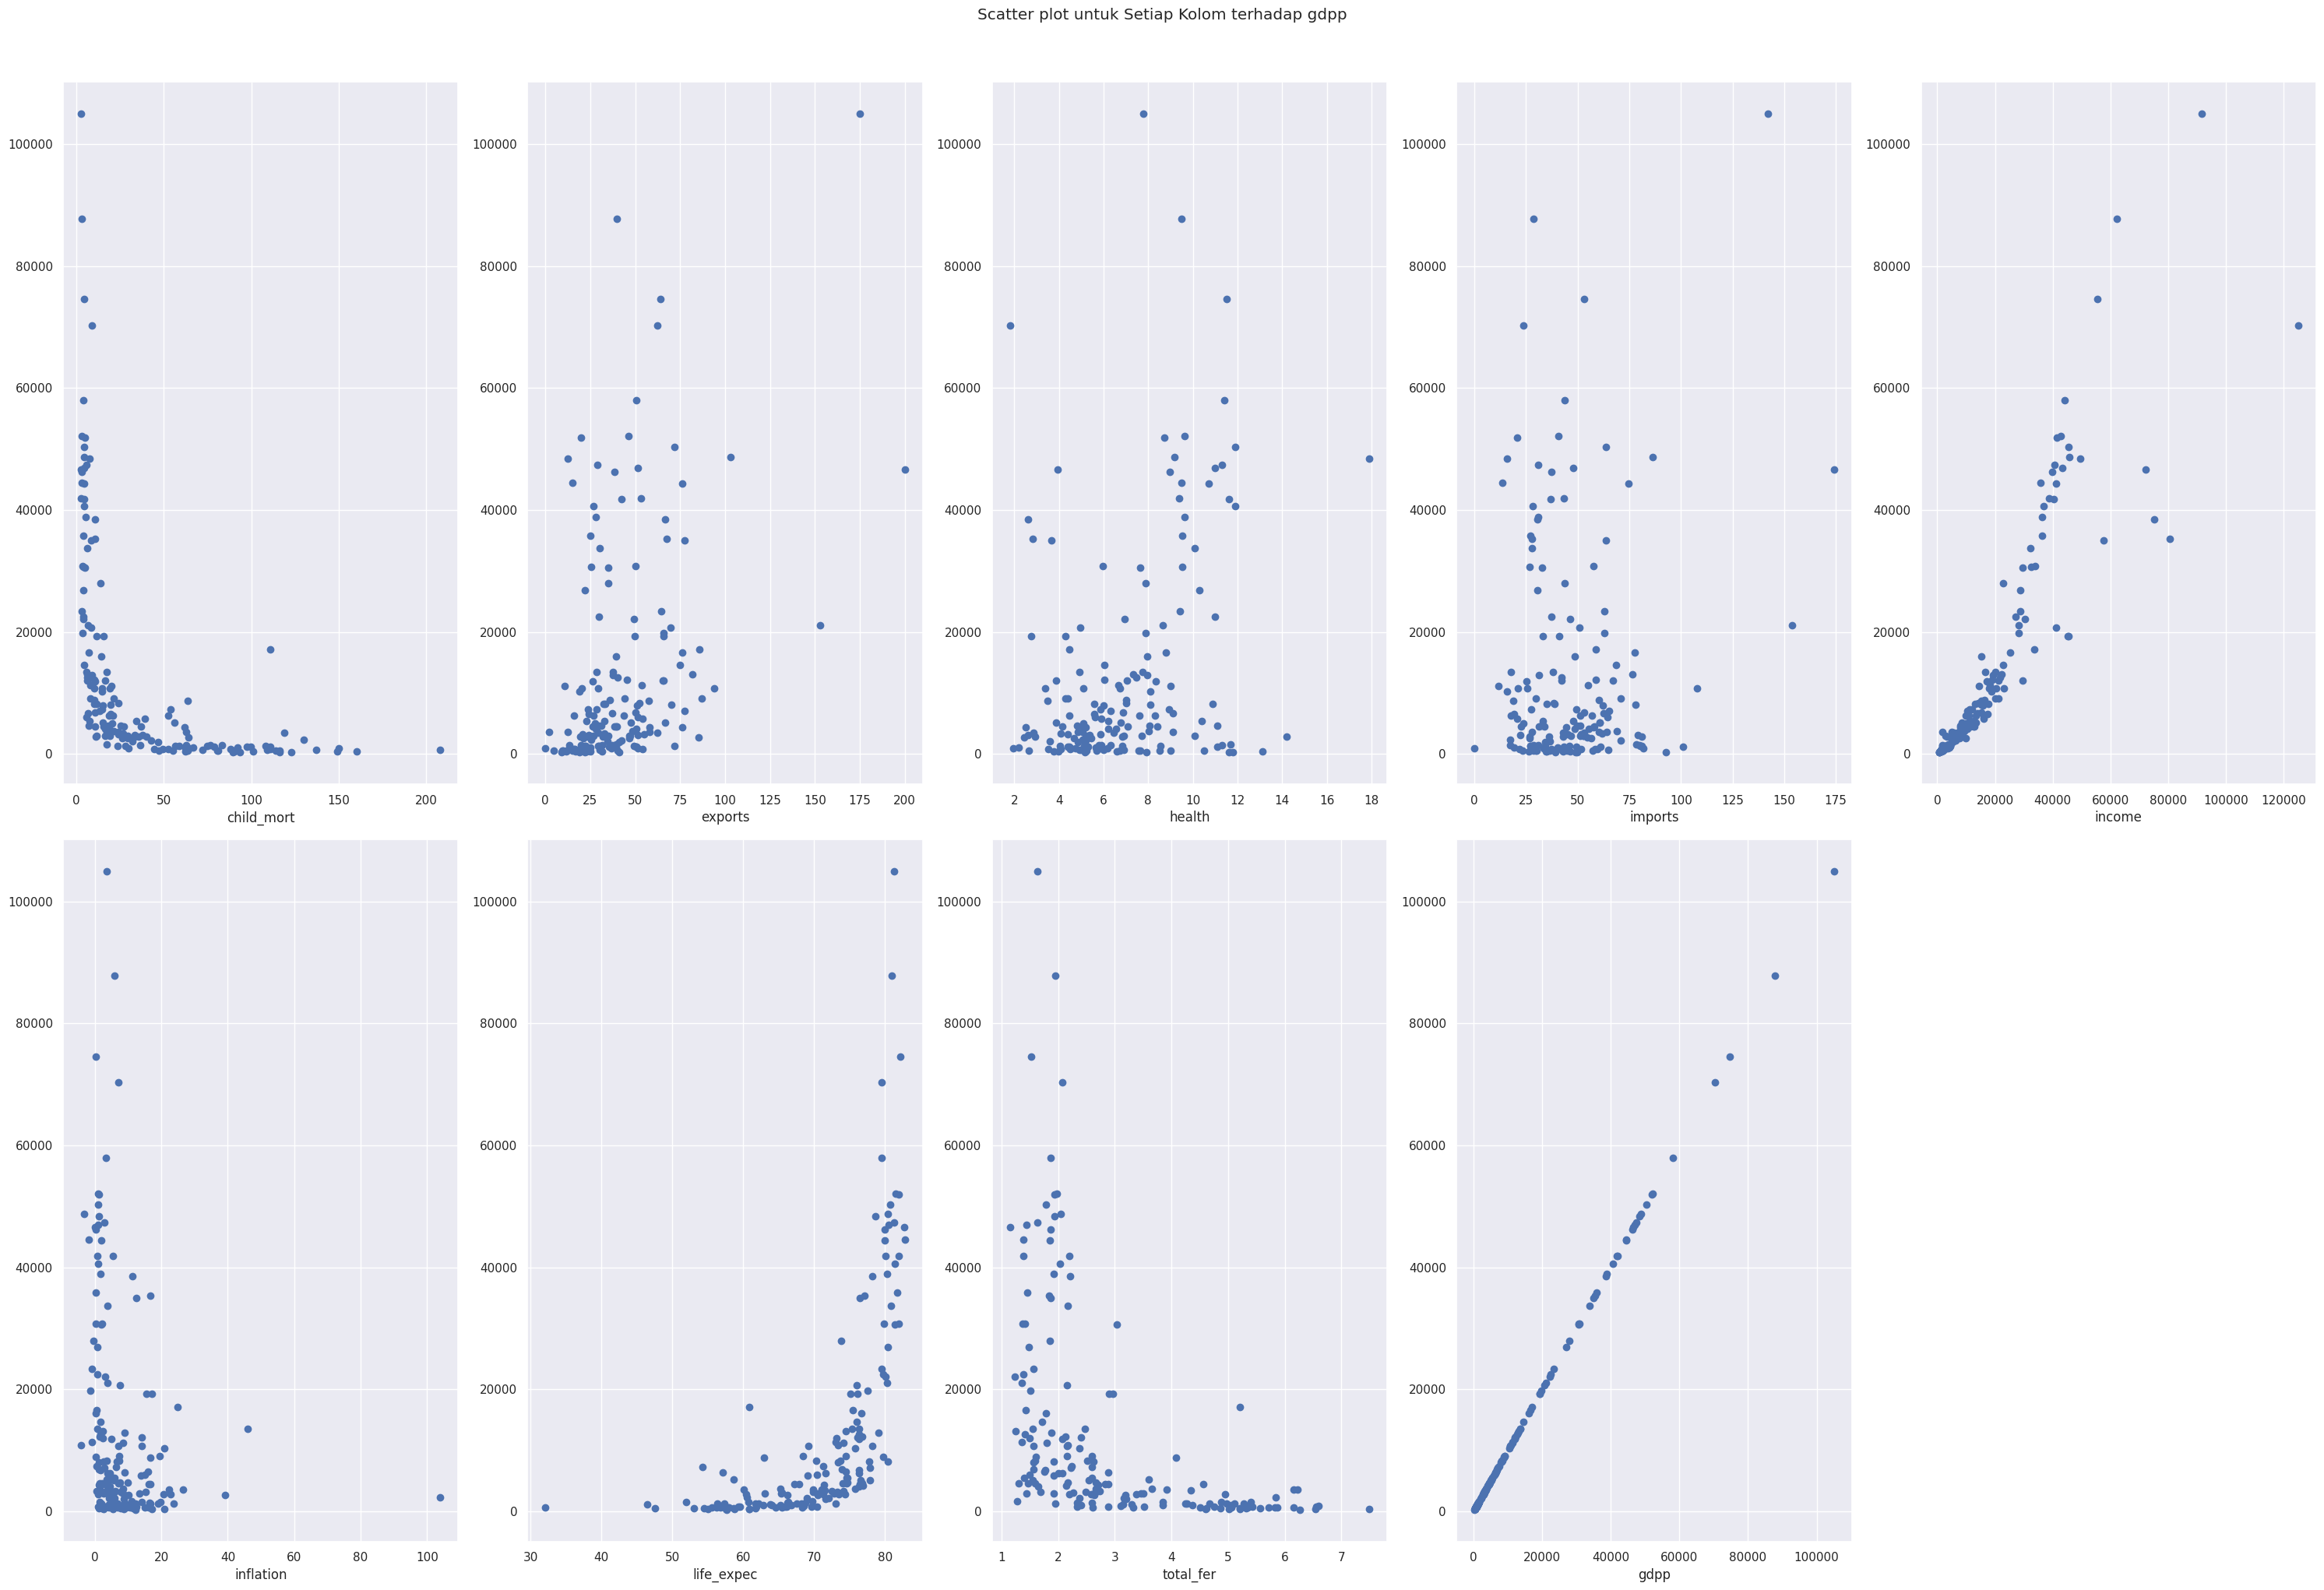

In [20]:
vis.scatter("gdpp").show()

In [21]:
scal = Skalasisasi(data_fitur)
min_Max = scal.minmax_scaler()
stand = scal.standar_scaler()

In [22]:
min_Max

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.001344,-0.002109,-0.002133,-0.001776,0.013162,-0.002115,-0.001668,-0.002149,0.003073
1,-0.002046,-0.001938,-0.002142,-0.001741,0.092575,-0.002162,-0.001477,-0.002189,0.036833
2,-0.001944,-0.001838,-0.002165,-0.001905,0.120923,-0.002051,-0.001475,-0.002177,0.040365
3,-0.001069,-0.001610,-0.002178,-0.001795,0.054110,-0.001991,-0.001631,-0.002146,0.031488
4,-0.002107,-0.001771,-0.002147,-0.001643,0.180101,-0.002191,-0.001472,-0.002185,0.114242
...,...,...,...,...,...,...,...,...,...
162,-0.001926,-0.001760,-0.002155,-0.001702,0.025952,-0.002180,-0.001604,-0.002171,0.026143
163,-0.002042,-0.001933,-0.002158,-0.002037,0.155284,-0.001767,-0.001485,-0.002181,0.126650
164,-0.001982,-0.001518,-0.002140,-0.001439,0.040651,-0.002089,-0.001507,-0.002186,0.010299
165,-0.001667,-0.001919,-0.002155,-0.001877,0.040556,-0.001980,-0.001561,-0.002160,0.010299


In [23]:
stand

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.702393,-0.706769,-0.706901,-0.704865,-0.619474,-0.706799,-0.704248,-0.706997,-0.677143
1,-0.706409,-0.705787,-0.706957,-0.704663,-0.165541,-0.707069,-0.703151,-0.707224,-0.484167
2,-0.705825,-0.705219,-0.707087,-0.705601,-0.003500,-0.706436,-0.703141,-0.707157,-0.463980
3,-0.700822,-0.703915,-0.707159,-0.704974,-0.385415,-0.706092,-0.704035,-0.706978,-0.514720
4,-0.706752,-0.704832,-0.706985,-0.704101,0.334767,-0.707236,-0.703124,-0.707198,-0.041692
...,...,...,...,...,...,...,...,...,...
162,-0.705721,-0.704772,-0.707028,-0.704439,-0.546365,-0.707171,-0.703877,-0.707123,-0.545273
163,-0.706381,-0.705759,-0.707046,-0.706354,0.192913,-0.704810,-0.703201,-0.707180,0.029235
164,-0.706043,-0.703386,-0.706941,-0.702939,-0.462343,-0.706654,-0.703326,-0.707208,-0.635842
165,-0.704243,-0.705678,-0.707032,-0.705437,-0.462889,-0.706027,-0.703632,-0.707060,-0.635842


In [24]:
stand.to_csv('data_standard.csv',index=False)
min_Max.to_csv('data_max.csv',index=False)